Introduction:

The productivity of the workers is a crucial measure for any organisation to
maximise profit. The aim of this statistical data analysis is to assess your skill
and capability to analyse an industrial data, revealing meaningful and
actionable insights for a garment company.

Data:

The dataset for this task is an industry-experts validated real-world data that
contains attributes of a garment manufacturing process and the productivity of
the employees involved in the garment production. There are 1197 production
records in the dataset and each record has 15 variables explaining it. You can
find the complete description of the dataset on this webpage. This link is also
important in understanding some of the dataset attributes. Also, a copy of the
dataset can be found on the course page on Moodle under the assignment
one section.

Tasks: (80%)

A. Perform a thorough statistical data analysis to generate meaningful
insights about the garment production processes from the given
dataset. Your insights should help to answer the following important
business questions for the authorities.

1. Does the individual teams’ actual productivity exceed their
targeted productivity, and which team is the most/worst
productive? Justify your answer.

2. Which of the two garment production processes (i.e., sewing
and finishing) is the hardest? Justify your answer.

3. Which of the days is mostly the rest day for the workers and
how does the resting affect their productivity afterwards?
Justify your answer.

4. When does the company pay more incentive to its workers?
And does both sewing and finishing departments enjoy the
same incentives? Justify your answer.

B. Suggest one additional but compelling research question to the
ones above and state clearly why the question is relevant for the
garment company. Provide a cogent answer to the question based on
a thorough analysis of the dataset.

Important Note:
The goal of this task is not to do an unfocused descriptive statistical data analysis i.e.,
do not calculate every descriptive statistic you have learned for every variable in the
data, but rather demonstrate that you are proficient at selecting appropriate statistical
methods, using statistical tools at a basic level, and interpreting and presenting the
results.

## Table of Contents: <a class="anchor" id="toc"></a>

1. [Data cleaning](#1)<br>
2. [Does the individual teams’ actual productivity exceed their targeted productivity, and which team is the most/worst productive?](#2)<br>
3. [Which of the two garment production processes (i.e., sewing and finishing) is the hardest? Justify your answer.](#3)<br>
4. [Which of the days is mostly the rest day for the workers and how does the resting affect their productivity afterwards?](#4)<br>
5. [When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives?](#5)<br>
6. [Suggest one additional but compelling research question to the ones above and state clearly why the question is relevant for the garment company. Provide a cogent answer to the question based on a thorough analysis of the dataset.?](#2)<br>



Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


Attribute Information:

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 team_no : Associated team number with the instance

06 no_of_workers : Number of workers in each team

07 no_of_style_change : Number of changes in the style of a particular product

08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.

09 smv : Standard Minute Value, it is the allocated time for a task

10 wip : Work in progress. Includes the number of unfinished items for products

11 over_time : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idle_time : The amount of time when the production was interrupted due to several reasons

14 idle_men : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


Relevant Papers:

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). [Web Link]

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. [Web Link]

In [697]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv('garments_worker_productivity.csv')


In [698]:
df.head(20)

date   quarter  department       day  team  targeted_productivity  \
0   1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1   1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2   1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3   1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4   1/1/2015  Quarter1      sweing  Thursday     6                   0.80   
5   1/1/2015  Quarter1      sweing  Thursday     7                   0.80   
6   1/1/2015  Quarter1  finishing   Thursday     2                   0.75   
7   1/1/2015  Quarter1      sweing  Thursday     3                   0.75   
8   1/1/2015  Quarter1      sweing  Thursday     2                   0.75   
9   1/1/2015  Quarter1      sweing  Thursday     1                   0.75   
10  1/1/2015  Quarter1      sweing  Thursday     9                   0.70   
11  1/1/2015  Quarter1      sweing  Thursday    10                   0.75   
12  1/1/2015  Quarter1      sweing  Thursday     5                   0.80   
13  1/1/2015  Quarter1  finishing   Thursday    10                   0.65   
14  1/1/2015  Quarter1  finishing   Thursday     8                   0.75   
15  1/1/2015  Quarter1  finishing   Thursday     4                   0.75   
16  1/1/2015  Quarter1  finishing   Thursday     7                   0.80   
17  1/1/2015  Quarter1      sweing  Thursday     4                   0.65   
18  1/1/2015  Quarter1   finishing  Thursday    11                   0.70   
19  1/3/2015  Quarter1  finishing   Saturday     4                   0.80   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
5   25.90   984.0       6720         38        0.0         0   
6    3.94     NaN        960          0        0.0         0   
7   28.08   795.0       6900         45        0.0         0   
8   19.87   733.0       6000         34        0.0         0   
9   28.08   681.0       6900         45        0.0         0   
10  28.08   872.0       6900         44        0.0         0   
11  19.31   578.0       6480         45        0.0         0   
12  11.41   668.0       3660         50        0.0         0   
13   3.94     NaN        960          0        0.0         0   
14   2.90     NaN        960          0        0.0         0   
15   3.94     NaN       2160          0        0.0         0   
16   2.90     NaN        960          0        0.0         0   
17  23.69   861.0       7200          0        0.0         0   
18   4.15     NaN       1440          0        0.0         0   
19   4.15     NaN       6600          0        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
5                    0           56.0             0.800125  
6                    0            8.0             0.755167  
7                    0           57.5             0.753683  
8                    0           55.0             0.753098  
9                    0           57.5             0.750428  
10                   0           57.5             0.721127  
11                   0           54.0             0.712205  
12                   0           30.5             0.707046  
13                   0            8.0             0.705917  
14                   0            8.0             0.676667  
15                   0           18.0             0.593056  
16      

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## 1. DataCleaning <a class="anchor" id="1"></a>

In [700]:
# convert the date column to datetime

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [701]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [702]:
# check for missing values  in the dataset

df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [703]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [704]:
df['date'] = pd.to_datetime(df['date'])

In [705]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [706]:
# convert the department column to category

#df['department'] = df['department'].astype('category')

In [707]:
# Creating a function which will remove extra leading
# and tailing whitespace from the data.
# pass dataframe as a parameter here
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(df)

In [708]:
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [709]:
# check for duplicates
sewing = df[df['department'] == 'sweing'].copy()
finishing = df[df['department'] == 'finishing'].copy()
df.duplicated().sum()

0

Intial exploration of the data set

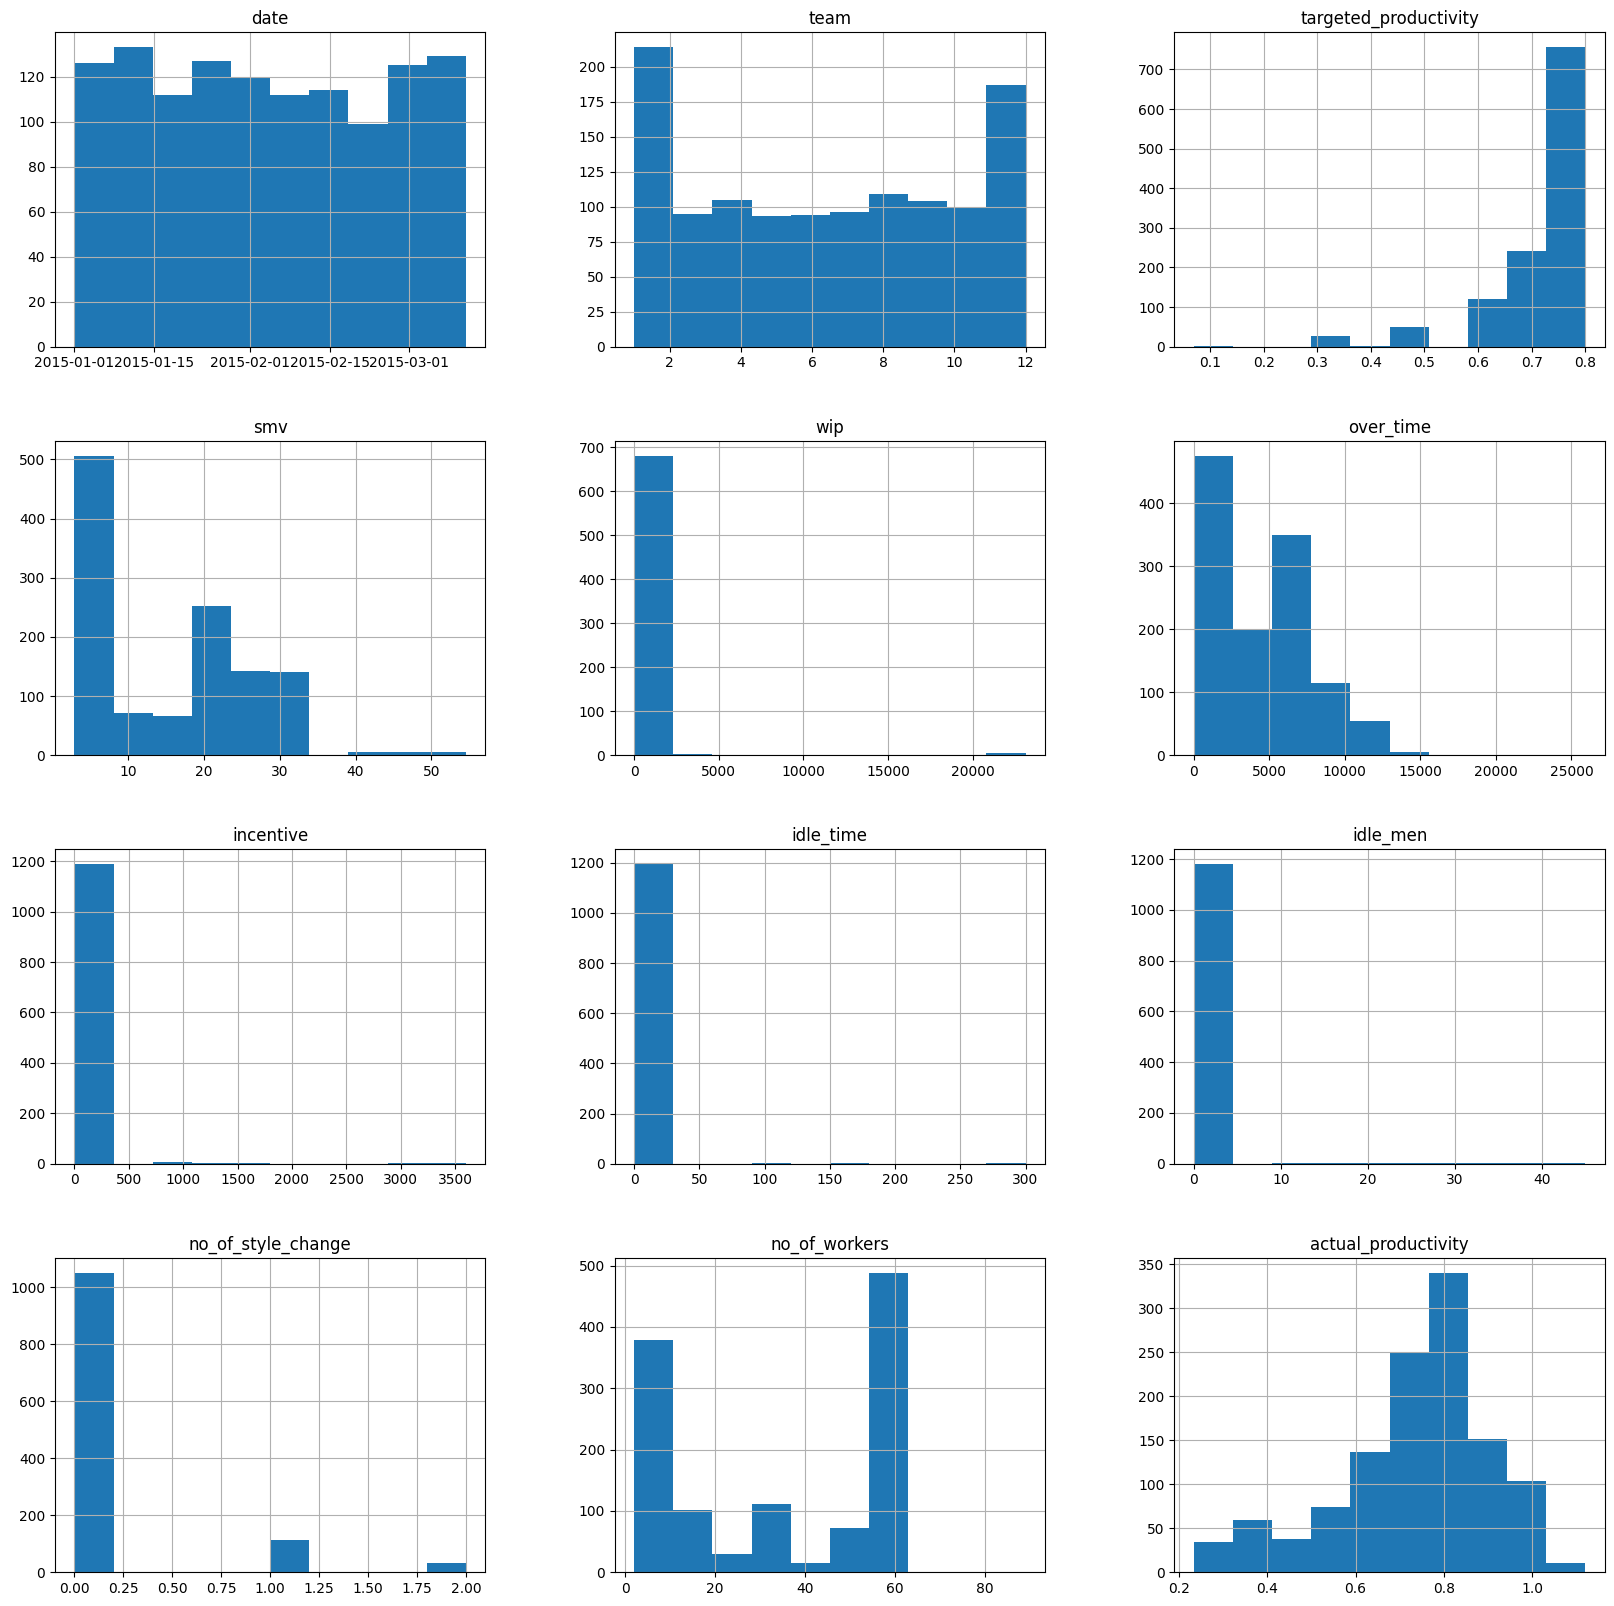

In [710]:
# plot all the columns in the dataset to see the distribution of the data

df.hist(figsize=(20,20))

plt.show()

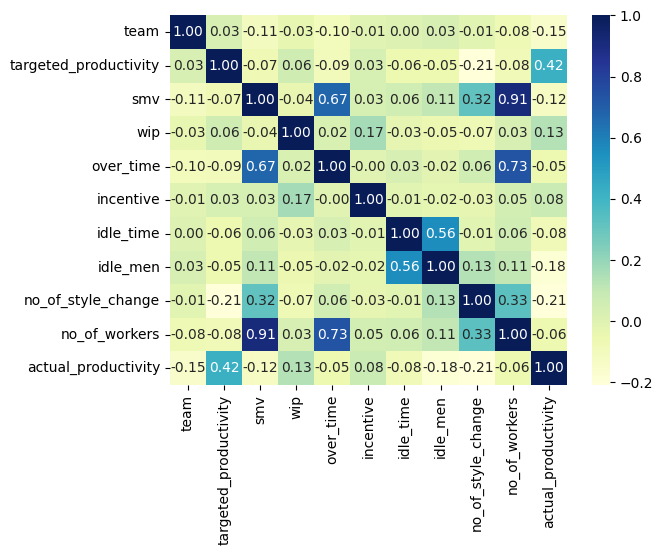

In [711]:
# check for correlation between the between the dictionary of outliers and the correlation column
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

# plot the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu")
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()


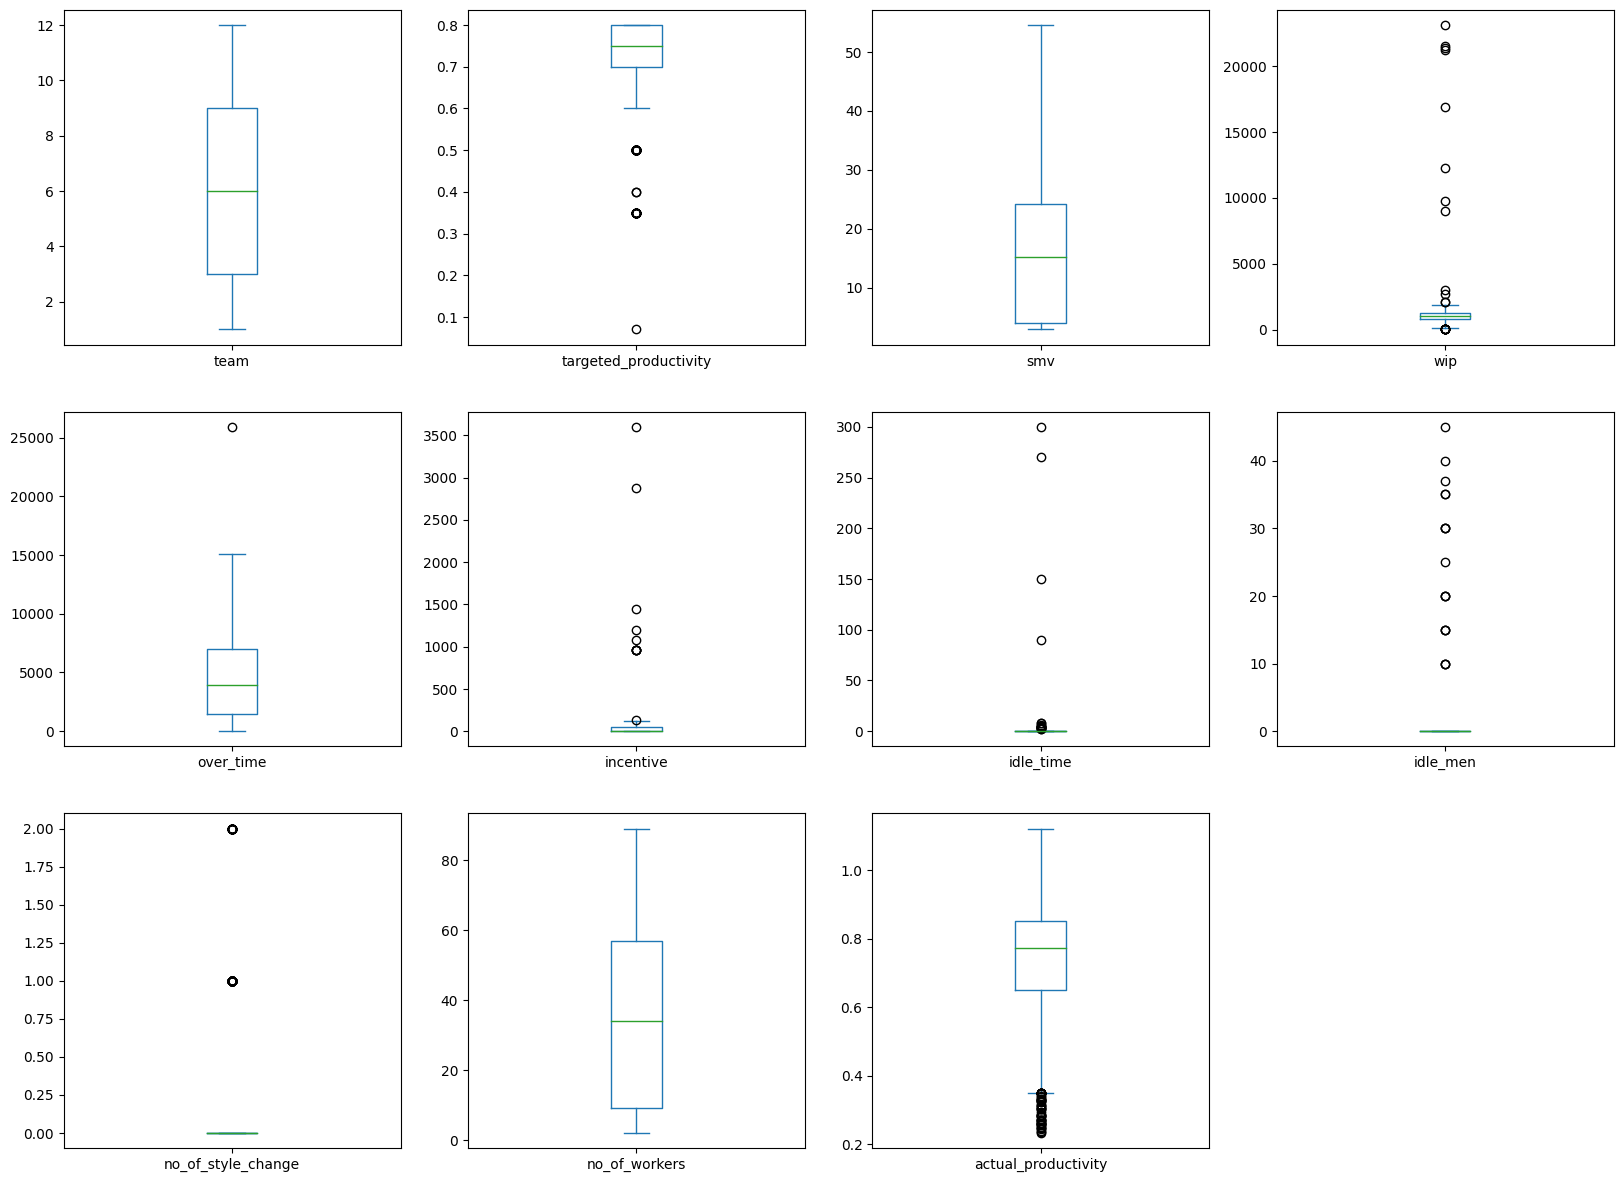

In [712]:
# check for outliers in the dataset
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))

plt.show()


In [713]:
frac_df = df.copy()

# convert all datapoints to fraction of the maximum value in each column of the dataframe if datatype is numeric effetiviely allowing us to compare the data points in each column
for col in frac_df.columns:
    if frac_df[col].dtype == 'int64' or frac_df[col].dtype == 'float64':
        frac_df[col] = frac_df[col]/frac_df[col].max()
        frac_df[col] = frac_df[col] * 100

frac_df.head(5)

date   quarter department       day        team  \
0 2015-01-01  Quarter1     sweing  Thursday   66.666667   
1 2015-01-01  Quarter1  finishing  Thursday    8.333333   
2 2015-01-01  Quarter1     sweing  Thursday   91.666667   
3 2015-01-01  Quarter1     sweing  Thursday  100.000000   
4 2015-01-01  Quarter1     sweing  Thursday   50.000000   

   targeted_productivity        smv       wip  over_time  incentive  \
0                 100.00  47.947214  4.791973  27.314815   2.722222   
1                  93.75   7.221408       NaN   3.703704   0.000000   
2                 100.00  20.912757  4.186489  14.120370   1.388889   
3                 100.00  20.912757  4.186489  14.120370   1.388889   
4                 100.00  47.470674  5.060116   7.407407   1.388889   

   idle_time  idle_men  no_of_style_change  no_of_workers  actual_productivity  
0        0.0       0.0                 0.0      66.292135            83.960544  
1        0.0       0.0                 0.0       8.988764            79.120879  
2        0.0       0.0                 0.0      34.269663            71.451597  
3        0.0       0.0                 0.0      34.269663            71.451597  
4        0.0       0.0                 0.0      62.921348            71.434769

In [714]:
frac_df.describe()

team  targeted_productivity          smv         wip  \
count  1197.000000            1197.000000  1197.000000  691.000000   
mean     53.557505              91.204052    27.606620    5.148629   
std      28.866361              12.236370    20.057220    7.946782   
min       8.333333               8.750000     5.315249    0.030274   
25%      25.000000              87.500000     7.221408    3.349624   
50%      50.000000              93.750000    27.969208    4.493556   
75%      75.000000             100.000000    44.464809    5.416919   
max     100.000000             100.000000   100.000000  100.000000   

         over_time    incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000  1197.000000         1197.000000   
mean     17.621375     1.061404     0.243386     0.820570            7.518797   
std      12.919844     4.449518     4.236586     7.264416           21.392393   
min       0.000000     0.000000     0.000000     0.000000            0.000000   
25%       5.555556     0.000000     0.000000     0.000000            0.000000   
50%      15.277778     0.000000     0.000000     0.000000            0.000000   
75%      26.851852     1.388889     0.000000     0.000000            0.000000   
max     100.000000   100.000000   100.000000   100.000000          100.000000   

       no_of_workers  actual_productivity  
count    1197.000000          1197.000000  
mean       38.887481            65.607506  
std        24.941221            15.573194  
min         2.247191            20.858413  
25%        10.112360            58.040466  
50%        38.202247            69.020658  
75%        64.044944            75.885761  
max       100.000000           100.000000

In [715]:
# could also probality distribution plots to see the distribution of the data

# plot the probability distribution of the data
pro_dis_df = df.copy()

# convert all datapoints to fraction of the maximum value in each column of the dataframe if datatype is numeric effetiviely allowing us to compare the data points in each column
for col in pro_dis_df.columns:
    if pro_dis_df[col].dtype == 'int64' or pro_dis_df[col].dtype == 'float64':
        pro_dis_df[col] = pro_dis_df[col]/pro_dis_df[col].sum()

pro_dis_df.head(5)
   

date   quarter department       day     team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday  0.00104               0.000916   
1 2015-01-01  Quarter1  finishing  Thursday  0.00013               0.000859   
2 2015-01-01  Quarter1     sweing  Thursday  0.00143               0.000916   
3 2015-01-01  Quarter1     sweing  Thursday  0.00156               0.000916   
4 2015-01-01  Quarter1     sweing  Thursday  0.00078               0.000916   

        smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.001451  0.001347   0.001295   0.002143        0.0       0.0   
1  0.000219       NaN   0.000176   0.000000        0.0       0.0   
2  0.000633  0.001177   0.000669   0.001093        0.0       0.0   
3  0.000633  0.001177   0.000669   0.001093        0.0       0.0   
4  0.001437  0.001422   0.000351   0.001093        0.0       0.0   

   no_of_style_change  no_of_workers  actual_productivity  
0                 0.0       0.001424             0.001069  
1                 0.0       0.000193             0.001007  
2                 0.0       0.000736             0.000910  
3                 0.0       0.000736             0.000910  
4                 0.0       0.001352             0.000910

In [716]:
pro_dis_df.describe()

team  targeted_productivity          smv         wip  \
count  1197.000000            1197.000000  1197.000000  691.000000   
mean      0.000835               0.000835     0.000835    0.001447   
std       0.000450               0.000112     0.000607    0.002234   
min       0.000130               0.000080     0.000161    0.000009   
25%       0.000390               0.000801     0.000219    0.000942   
50%       0.000780               0.000859     0.000846    0.001263   
75%       0.001170               0.000916     0.001346    0.001523   
max       0.001560               0.000916     0.003026    0.028108   

         over_time    incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000  1197.000000         1197.000000   
mean      0.000835     0.000835     0.000835     0.000835            0.000835   
std       0.000613     0.003502     0.014542     0.007396            0.002377   
min       0.000000     0.000000     0.000000     0.000000            0.000000   
25%       0.000263     0.000000     0.000000     0.000000            0.000000   
50%       0.000724     0.000000     0.000000     0.000000            0.000000   
75%       0.001273     0.001093     0.000000     0.000000            0.000000   
max       0.004741     0.078709     0.343249     0.101810            0.011111   

       no_of_workers  actual_productivity  
count    1197.000000          1197.000000  
mean        0.000835             0.000835  
std         0.000536             0.000198  
min         0.000048             0.000266  
25%         0.000217             0.000739  
50%         0.000821             0.000879  
75%         0.001376             0.000966  
max         0.002148             0.001273

In [717]:
pro_dis_df_1 = pro_dis_df.set_index('date').groupby('date').sum().copy()

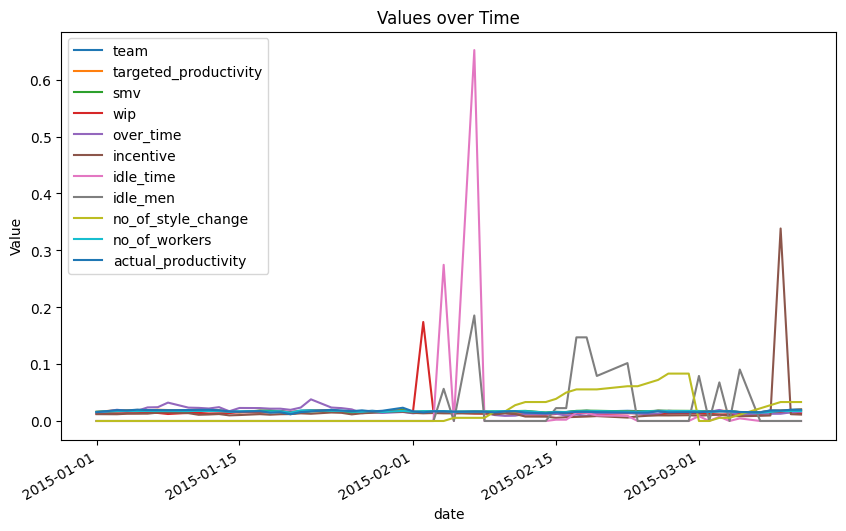

In [718]:
pro_dis_df_1.plot(figsize=(10, 6), layout=(4,4), sharex=False, sharey=False, legend=True)
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Values over Time')
plt.show()

In [719]:
# plot all the columns in the df on the y axis add time on x distrubution by percentile
# Set the Date column as the index of the DataFrame
frac_df_1 = frac_df.set_index('date').groupby('date').mean().copy()



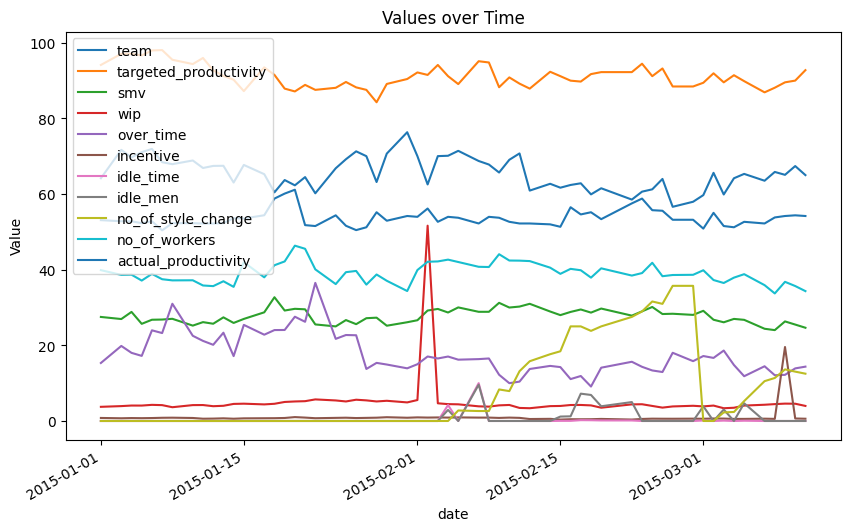

In [720]:

frac_df_1.plot(figsize=(10, 6), layout=(4,4), sharex=False, sharey=False, legend=True)
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Values over Time')
plt.show()



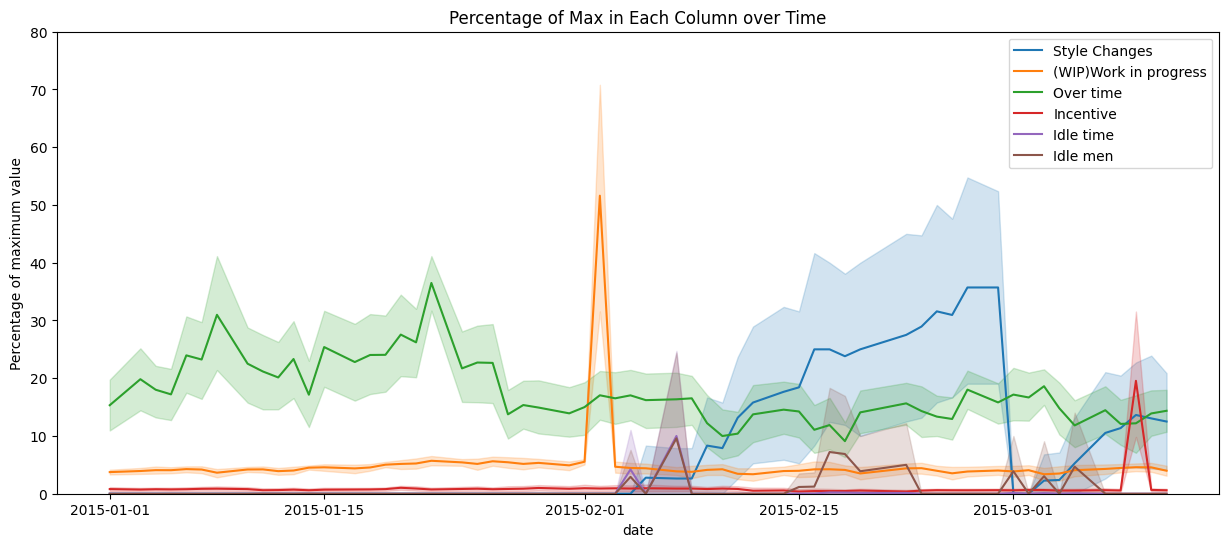

In [721]:
# plotting the precentage of maxmimum value of each column in the dataset
plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y='no_of_style_change', data=frac_df, label='Style Changes')
sns.lineplot(x='date' , y='wip', data=frac_df, label='(WIP)Work in progress')
sns.lineplot(x='date' , y='over_time', data=frac_df, label='Over time')
sns.lineplot(x='date' , y='incentive', data=frac_df, label='Incentive')
sns.lineplot(x='date' , y='idle_time', data=frac_df, label='Idle time')
sns.lineplot(x='date' , y='idle_men', data=frac_df, label='Idle men')
plt.ylim(0, 80)  # set y-axis limit to 0-100%
plt.title('Percentage of Max in Each Column over Time')
plt.ylabel('Percentage of maximum value')
plt.savefig('percentage of max.png',bbox_inches='tight')
plt.show()


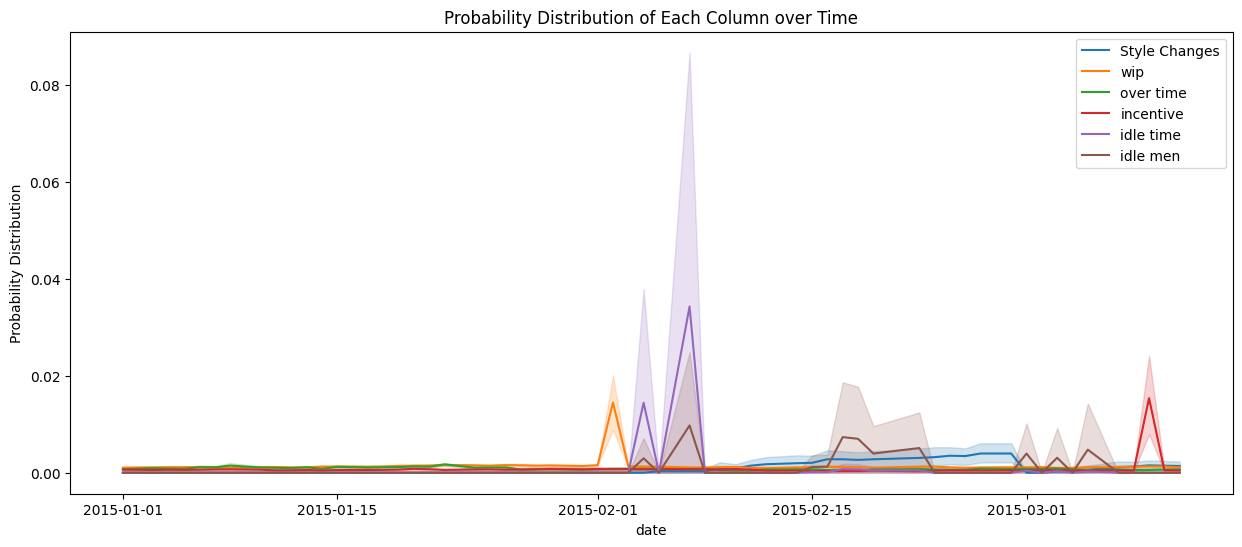

In [722]:
# plotting the probability distribution of the data
plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y='no_of_style_change', data=pro_dis_df, label='Style Changes')
sns.lineplot(x='date' , y='wip', data=pro_dis_df, label='wip')
sns.lineplot(x='date' , y='over_time', data=pro_dis_df, label='over time')
sns.lineplot(x='date' , y='incentive', data=pro_dis_df, label='incentive')
sns.lineplot(x='date' , y='idle_time', data=pro_dis_df, label='idle time')
sns.lineplot(x='date' , y='idle_men', data=pro_dis_df, label='idle men')
plt.title('Probability Distribution of Each Column over Time')
plt.ylabel('Probability Distribution')
plt.show()

In [723]:
#from pandasgui import show
#Deploy the GUI of the df dataset
#show(df)

In [724]:
df.head()

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [725]:
def get_column_headers(data):
    column_list = list(data.columns)
    return column_list

get_column_headers(df)

['date',
 'quarter',
 'department',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [726]:
import numpy as np

# import deepcopy to create a copy of the dataframe
from copy import deepcopy

from scipy.stats import mode


df_outliers = df.copy(deep = True)

# Define function to detect and impute missing values using z-score
def detect_impute_outliers_zscore(data, cols, remove_outliers=False, corr_col=None,thres = 2, nan_method= 0):
    compair_data = data.copy(deep = True) # create a copy of the original dataframe
    outlier_df = pd.DataFrame() # create an empty dataframe to store the outliers
    outlier_dict = {}  # create an empty dictionary to store outliers for each column
    # thres set the threshold for the standard deviations, 3 is the default value for outliers
    table = [] # create an empty list to store the results of the z-score calculation
    for col in cols:
        column_data = data[col] # extract the data from the specified column
        count = 0
        if column_data.isna().sum() > 0: # check if the column contains missing values
            # impute the missing values based on the method specified in the 'nan_method' parameter
            if nan_method == 'mean':
                column_data = column_data.fillna(np.nanmean(column_data))
            elif nan_method == 'median':
                column_data = column_data.fillna(np.nanmedian(column_data))
            elif nan_method == 'mode':
                column_data = column_data.fillna(mode(column_data).mode[0])
            else:
                # imputs whatever value is specified in the 'nan_method' parameter
                column_data = column_data.fillna(nan_method)

        data[col] = column_data # update the column in the original dataframe with the imputed values
        mean = np.mean(column_data)  # calculate the mean of the specified column
        std = np.std(column_data)    # calculate the standard deviation of the specified column
        print(col,"\n")
        print("Imputed values: ", column_data.isna().sum()) # keep track of the number of imputed values
        print("before Mean:", mean, "Std:", std)    # print the calculated mean and standard deviation for the column
        print("Count:", count)
        outliers = []   # create an empty list to store outliers for the current column
        for i in column_data:    # loop through each element in the specified column
            z_score = (i-mean)/std   # calculate the z-score for the element
            count += 1
            if (np.abs(z_score) > thres):   # if the absolute value of the z-score is greater than the threshold
                if corr_col is not None:
                    outlier_pair = (i, compair_data[corr_col][count-1]) # create a tuple containing the outlier and its corresponding value from the correlation column
                    outliers.append(outlier_pair)  # add the tuple to the list of outliers
                    
            
                else:
                    outliers.append(i)
                if remove_outliers:
                    #data = data[data[col] != i] # remove the record tied to outlier from the dataframe
                    # apend the outlier to the outlier_df dataframe
                    outlier_df = outlier_df.append(data[data[col] == i])                    
                    #replace the outlier with the mean of the column
                    data[col] = data[col].replace(i, np.nanmean(column_data))
        
        outlier_dict[col] = outliers   # store the outliers for the current column in the outlier_dict
        mean = np.mean(data[col])  # calculate the mean of the specified column
        std = np.std(data[col])    # calculate the standard deviation of the specified column
        print("after Mean:", mean, "Std:", std, "\n")    # print the calculated mean and standard deviation for the column
        print("Outliers:", outliers, "\n")   # print the list of outliers for the column
       
    return outlier_dict, data, outlier_df   # return the dictionary of outliers and the updated dataframe





In [727]:
# Driver code
cols_to_check = [
 'targeted_productivity',
 'actual_productivity']   # define the columns to check for outliers

corr_col = 'date'  # specify a column to check correlations

# call the detect_impute_outliers_zscore function with the data 'df', the specified columns, and the mean imputation method, and remove outliers from the dataframe
#outliers_dict, updated_df, outlier_df = detect_impute_outliers_zscore(df_outliers, cols_to_check, remove_outliers=True, corr_col=corr_col,thres=2)   

In [728]:
# if not running

#outliers_dict =  ()
#updated_df = df

In [811]:
# Driver code
cols_to_check = [
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']   # define the columns to check for outliers

#corr_col = 'date'  # specify a column to check correlations

# call the detect_impute_outliers_zscore function with the data 'df', the specified columns, and the mean imputation method, and remove outliers from the dataframe
outliers_dict, updated_df, outlier_df = detect_impute_outliers_zscore(df_outliers, cols_to_check, remove_outliers=True, corr_col=corr_col,thres=1)   

targeted_productivity 

Imputed values:  0
before Mean: 0.7486975444738247 Std: 0.057067297223986325
Count: 0


C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 0.7609729875288426 Std: 0.039247828613036016 

Outliers: [(0.65, Timestamp('2015-01-01 00:00:00')), (0.65, Timestamp('2015-01-01 00:00:00')), (0.6, Timestamp('2015-01-05 00:00:00')), (0.6, Timestamp('2015-01-05 00:00:00')), (0.65, Timestamp('2015-01-06 00:00:00')), (0.6, Timestamp('2015-01-11 00:00:00')), (0.6, Timestamp('2015-01-11 00:00:00')), (0.65, Timestamp('2015-01-12 00:00:00')), (0.65, Timestamp('2015-01-12 00:00:00')), (0.65, Timestamp('2015-01-12 00:00:00')), (0.65, Timestamp('2015-01-13 00:00:00')), (0.65, Timestamp('2015-01-14 00:00:00')), (0.6, Timestamp('2015-01-14 00:00:00')), (0.65, Timestamp('2015-01-15 00:00:00')), (0.65, Timestamp('2015-01-15 00:00:00')), (0.6, Timestamp('2015-01-15 00:00:00')), (0.65, Timestamp('2015-01-17 00:00:00')), (0.6, Timestamp('2015-01-17 00:00:00')), (0.65, Timestamp('2015-01-17 00:00:00')), (0.6, Timestamp('2015-01-17 00:00:00')), (0.6, Timestamp('2015-01-17 00:00:00')), (0.6, Timestamp('2015-01-18 00:00:00')), (0.65, Timestamp

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 15.420019490186236 Std: 4.153221753231887 

Outliers: [(26.16, Timestamp('2015-01-01 00:00:00')), (3.94, Timestamp('2015-01-01 00:00:00')), (25.9, Timestamp('2015-01-01 00:00:00')), (25.9, Timestamp('2015-01-01 00:00:00')), (3.94, Timestamp('2015-01-01 00:00:00')), (28.08, Timestamp('2015-01-01 00:00:00')), (28.08, Timestamp('2015-01-01 00:00:00')), (28.08, Timestamp('2015-01-01 00:00:00')), (3.94, Timestamp('2015-01-01 00:00:00')), (2.9, Timestamp('2015-01-01 00:00:00')), (3.94, Timestamp('2015-01-01 00:00:00')), (2.9, Timestamp('2015-01-01 00:00:00')), (4.15, Timestamp('2015-01-01 00:00:00')), (4.15, Timestamp('2015-01-03 00:00:00')), (2.9, Timestamp('2015-01-03 00:00:00')), (4.15, Timestamp('2015-01-03 00:00:00')), (3.94, Timestamp('2015-01-03 00:00:00')), (3.94, Timestamp('2015-01-03 00:00:00')), (28.08, Timestamp('2015-01-03 00:00:00')), (28.08, Timestamp('2015-01-03 00:00:00')), (26.16, Timestamp('2015-01-03 00:00:00')), (26.16, Timestamp('2015-01-03 00:00:00')), (25.

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 667.0345563138751 Std: 200.5591362464264 

Outliers: [(0.0, Timestamp('2015-01-01 00:00:00')), (1170.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-01 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (1261.0, Timestamp('2015-01-03 00:00:00')), (1152.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-03 00:00:00')), (0.0, Timestamp('2015-01-04 00:00:00')), (0.0, Timestamp('2015-01-04 00:00:00')), (0.0, Timestamp('2015-01-04 00:00:00')), (0.0, Timestamp('2015-0

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 4473.850965879908 Std: 1732.2046417466158 

Outliers: [(960.0, Timestamp('2015-01-01 00:00:00')), (960.0, Timestamp('2015-01-01 00:00:00')), (960.0, Timestamp('2015-01-01 00:00:00')), (960.0, Timestamp('2015-01-01 00:00:00')), (960.0, Timestamp('2015-01-01 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-03 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-04 00:00:00')), (960.0, Timestamp('2015-01-05 00:00:00')), (960.0, Timestamp('2015-01-05 00:00:00')), (960.0, Timestamp('2015-01-05 00:00:00')), (960.0, Timestamp('2015-01-05 00:00:00')), (960.0, Timestamp('2015-01-05 

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 17.655632287419518 Std: 19.315169248216915 

Outliers: [(98.0, Timestamp('2015-01-01 00:00:00')), (63.0, Timestamp('2015-01-03 00:00:00')), (60.0, Timestamp('2015-01-04 00:00:00')), (60.0, Timestamp('2015-01-04 00:00:00')), (63.0, Timestamp('2015-01-04 00:00:00')), (75.0, Timestamp('2015-01-05 00:00:00')), (63.0, Timestamp('2015-01-05 00:00:00')), (75.0, Timestamp('2015-01-06 00:00:00')), (75.0, Timestamp('2015-01-06 00:00:00')), (75.0, Timestamp('2015-01-07 00:00:00')), (75.0, Timestamp('2015-01-07 00:00:00')), (60.0, Timestamp('2015-01-07 00:00:00')), (63.0, Timestamp('2015-01-07 00:00:00')), (69.0, Timestamp('2015-01-07 00:00:00')), (88.0, Timestamp('2015-01-08 00:00:00')), (75.0, Timestamp('2015-01-08 00:00:00')), (75.0, Timestamp('2015-01-08 00:00:00')), (60.0, Timestamp('2015-01-08 00:00:00')), (60.0, Timestamp('2015-01-08 00:00:00')), (63.0, Timestamp('2015-01-08 00:00:00')), (63.0, Timestamp('2015-01-08 00:00:00')), (69.0, Timestamp('2015-01-08 00:00:00')), (75.0, T

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 0.013610826206224462 Std: 0.037132725000097976 

Outliers: [(1.0, Timestamp('2015-02-05 00:00:00')), (1.0, Timestamp('2015-02-07 00:00:00')), (1.0, Timestamp('2015-02-08 00:00:00')), (1.0, Timestamp('2015-02-09 00:00:00')), (1.0, Timestamp('2015-02-09 00:00:00')), (1.0, Timestamp('2015-02-09 00:00:00')), (1.0, Timestamp('2015-02-10 00:00:00')), (1.0, Timestamp('2015-02-10 00:00:00')), (1.0, Timestamp('2015-02-10 00:00:00')), (1.0, Timestamp('2015-02-11 00:00:00')), (1.0, Timestamp('2015-02-11 00:00:00')), (1.0, Timestamp('2015-02-11 00:00:00')), (1.0, Timestamp('2015-02-11 00:00:00')), (1.0, Timestamp('2015-02-11 00:00:00')), (1.0, Timestamp('2015-02-12 00:00:00')), (1.0, Timestamp('2015-02-12 00:00:00')), (1.0, Timestamp('2015-02-12 00:00:00')), (1.0, Timestamp('2015-02-12 00:00:00')), (1.0, Timestamp('2015-02-14 00:00:00')), (1.0, Timestamp('2015-02-14 00:00:00')), (1.0, Timestamp('2015-02-14 00:00:00')), (1.0, Timestamp('2015-02-14 00:00:00')), (1.0, Timestamp('2015-02-1

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 36.62225691655958 Std: 9.377344691069062 

Outliers: [(59.0, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-01 00:00:00')), (57.5, Timestamp('2015-01-01 00:00:00')), (57.5, Timestamp('2015-01-01 00:00:00')), (57.5, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-01 00:00:00')), (60.0, Timestamp('2015-01-01 00:00:00')), (12.0, Timestamp('2015-01-01 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (59.0, Timestamp('2015-01-03 00:00:00')), (59.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (60.0, Timestamp('2015-01-03 00:00:00')), (57.5, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-01-03 00:00:00')), (8.0, Timestamp('2015-

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

after Mean: 0.7632041004562967 Std: 0.05218695096321933 

Outliers: [(0.940725424, Timestamp('2015-01-01 00:00:00')), (0.593055556, Timestamp('2015-01-01 00:00:00')), (0.540729167, Timestamp('2015-01-01 00:00:00')), (0.52118, Timestamp('2015-01-01 00:00:00')), (0.436326389, Timestamp('2015-01-01 00:00:00')), (0.988024691, Timestamp('2015-01-03 00:00:00')), (0.987880435, Timestamp('2015-01-03 00:00:00')), (0.956270833, Timestamp('2015-01-03 00:00:00')), (0.945277778, Timestamp('2015-01-03 00:00:00')), (0.902916667, Timestamp('2015-01-03 00:00:00')), (0.991388889, Timestamp('2015-01-04 00:00:00')), (0.931645833, Timestamp('2015-01-04 00:00:00')), (0.915229167, Timestamp('2015-01-04 00:00:00')), (0.603432184, Timestamp('2015-01-04 00:00:00')), (0.961059028, Timestamp('2015-01-05 00:00:00')), (0.939513889, Timestamp('2015-01-05 00:00:00')), (0.600028736, Timestamp('2015-01-05 00:00:00')), (0.966781346, Timestamp('2015-01-06 00:00:00')), (0.936496212, Timestamp('2015-01-06 00:00:00')), (0.8

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[data[col] == i])
C:\Users\krist\AppData\Local\Temp\ipykernel_6320\363999225.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append(data[d

In [730]:
outlier_df.describe()


team  targeted_productivity         smv           wip  \
count  258.000000             258.000000  258.000000    230.000000   
mean     6.558140               0.641120   18.591692   1219.595652   
std      3.238645               0.149139   12.869505   3193.347788   
min      1.000000               0.070000    2.900000      0.000000   
25%      4.000000               0.500000    4.300000    149.500000   
50%      7.000000               0.700000   18.790000    715.000000   
75%      9.000000               0.750000   29.400000   1092.000000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time    incentive   idle_time    idle_men  no_of_style_change  \
count    258.000000   258.000000  258.000000  258.000000          258.000000   
mean    5118.982404    73.748878    4.193337    2.318069            0.458530   
std     3888.815817   337.822241   28.729400    7.989086            0.748021   
min        0.000000     0.000000    0.000000    0.000000            0.000000   
25%     1800.000000     0.000000    0.000000    0.000000            0.000000   
50%     5400.000000     0.000000    0.000000    0.000000            0.000000   
75%     6960.000000    30.000000    0.000000    0.000000            1.000000   
max    25920.000000  3600.000000  300.000000   45.000000            2.000000   

       no_of_workers  actual_productivity  
count     258.000000           258.000000  
mean       40.540698             0.524372  
std        21.542359             0.221981  
min         4.000000             0.233705  
25%        12.000000             0.349990  
50%        54.000000             0.500029  
75%        57.000000             0.700565  
max        89.000000             1.120437

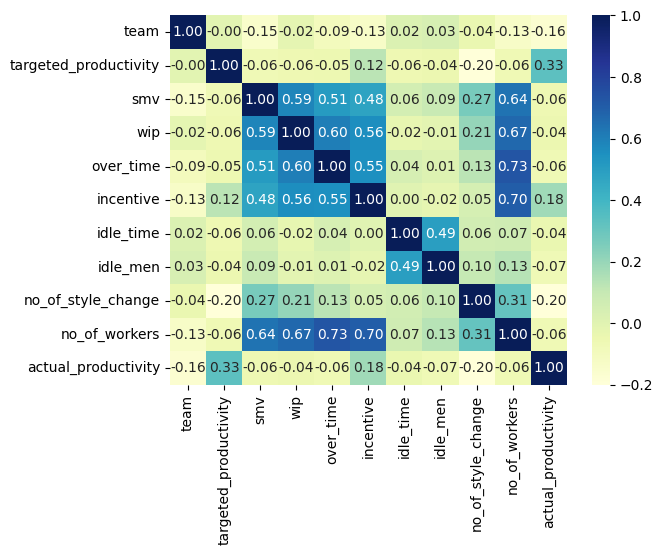

In [812]:
# check for correlation between the between the dictionary of outliers and the correlation column
corr = outlier_df.corr()
corr.style.background_gradient(cmap='coolwarm')

# plot the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu")

plt.show()



In [732]:
# plot all the columns in the df on the y axis add time on x distrubution by percentile
# Set the Date column as the index of the DataFrame
outlier_df_1 = outlier_df.set_index('date').groupby('date').mean().copy(deep=True)


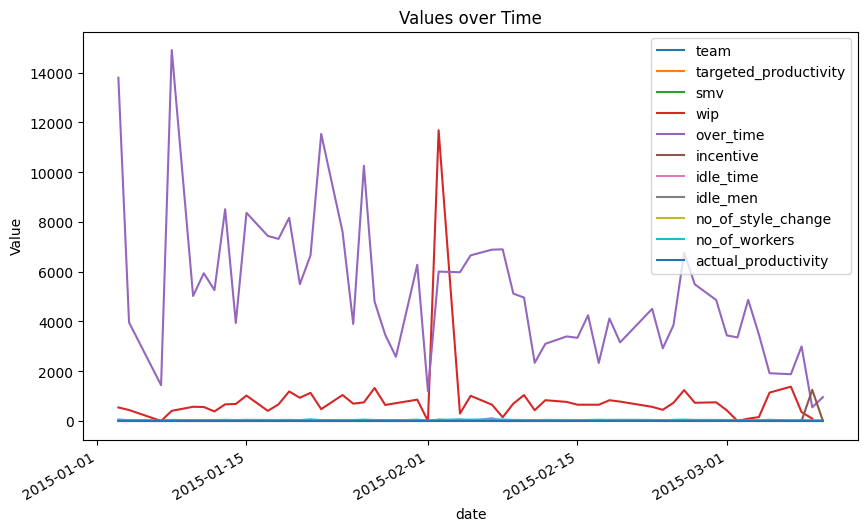

In [733]:

# Plot the data
outlier_df_1.plot(figsize=(10, 6), layout=(4,4), sharex=False, sharey=False, legend=True)
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Values over Time')
plt.show()

In [734]:
# could also probality distribution plots to see the distribution of the data

# plot the probability distribution of the data
pro_dis_out_df = outlier_df.copy(deep=True)

# convert all datapoints to fraction of the maximum value in each column of the dataframe if datatype is numeric effetiviely allowing us to compare the data points in each column
for col in pro_dis_out_df.columns:
    if pro_dis_out_df[col].dtype == 'int64' or pro_dis_out_df[col].dtype == 'float64':
        pro_dis_out_df[col] = pro_dis_out_df[col]/pro_dis_out_df[col].sum()

pro_dis_out_df.head(100)
   

date   quarter department        day      team  \
146 2015-01-08  Quarter2     sweing   Thursday  0.006501   
194 2015-01-12  Quarter2  finishing     Monday  0.002364   
214 2015-01-12  Quarter2     sweing     Monday  0.002364   
216 2015-01-13  Quarter2  finishing    Tuesday  0.002364   
237 2015-01-13  Quarter2     sweing    Tuesday  0.005910   
..         ...       ...        ...        ...       ...   
493 2015-01-28  Quarter4     sweing  Wednesday  0.004728   
537 2015-01-31  Quarter5     sweing   Saturday  0.002955   
561 2015-02-02  Quarter1     sweing     Monday  0.000591   
563 2015-02-02  Quarter1     sweing     Monday  0.001182   
564 2015-02-02  Quarter1     sweing     Monday  0.001773   

     targeted_productivity       smv       wip  over_time  incentive  \
146               0.002116  0.002610  0.001023   0.019626   0.001997   
194               0.002116  0.000896       NaN   0.002453   0.000000   
214               0.002116  0.004670  0.002071   0.005565   0.000000   
216               0.002116  0.000896       NaN   0.001635   0.000000   
237               0.002116  0.004670  0.002549   0.007700   0.001209   
..                     ...       ...       ...        ...        ...   
493               0.004232  0.007941  0.001198   0.004725   0.000000   
537               0.004232  0.010609  0.001005   0.004452   0.002943   
561               0.004836  0.004782  0.060184   0.005315   0.005939   
563               0.004836  0.004695  0.076237   0.005315   0.004625   
564               0.004836  0.004695  0.075813   0.005179   0.003679   

     idle_time  idle_men  no_of_style_change  no_of_workers  \
146        0.0       0.0                 0.0       0.005163   
194        0.0       0.0                 0.0       0.001721   
214        0.0       0.0                 0.0       0.004924   
216        0.0       0.0                 0.0       0.001147   
237        0.0       0.0                 0.0       0.005402   
..         ...       ...                 ...            ...   
493        0.0       0.0                 0.0       0.004972   
537        0.0       0.0                 0.0       0.005641   
561        0.0       0.0                 0.0       0.005593   
563        0.0       0.0                 0.0       0.005593   
564        0.0       0.0                 0.0       0.005450   

     actual_productivity  
146             0.002587  
194             0.006964  
214             0.002592  
216             0.007037  
237             0.002589  
..                   ...  
493             0.003457  
537             0.004855  
561             0.007396  
563             0.006654  
564             0.006654  

[100 rows x 15 columns]

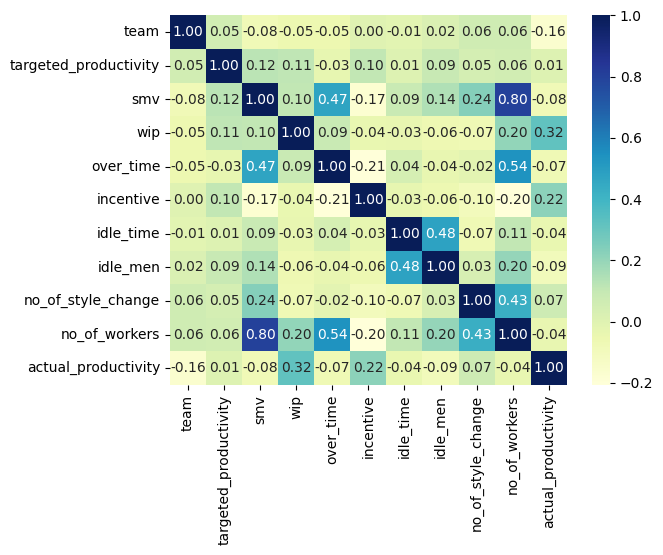

In [735]:
# check for correlation between the between the dictionary of outliers and the correlation column
corr = pro_dis_out_df.corr()
corr.style.background_gradient(cmap='coolwarm')

# plot the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu")

# save the correlation matrix to a file
plt.savefig('correlation_matrix_outliers.png',bbox_inches='tight')
plt.show()


In [736]:
pro_dis_out_df = pro_dis_out_df.set_index('date').groupby('date').sum()

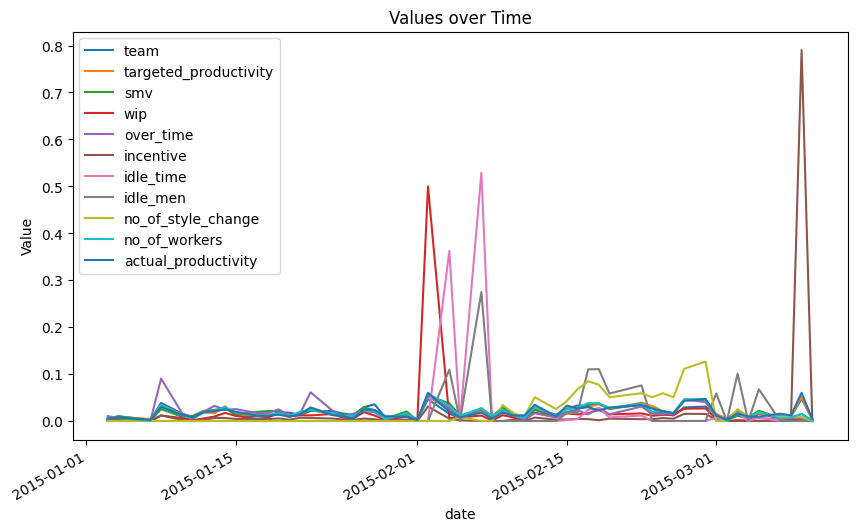

In [737]:
# Plot the data
pro_dis_out_df.plot(figsize=(10, 6), layout=(4,4), sharex=False, sharey=False, legend=True)
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Values over Time')
plt.show()


In [738]:

outliers_stats = []
for key in outliers_dict:
    sum = 0
    count = 0
    print(key)
    key[0]
    for y in outliers_dict[key]:
        sum += y[0]
        count += 1
          
    print("Average: ", round(sum/count,2))
    print("Average of total: ", round((count/1297*100),2))
    print("count", count, "\n")


targeted_productivity
Average:  0.44
Average of total:  6.09
count 79 

smv
Average:  46.53
Average of total:  1.39
count 18 

wip
Average:  16905.0
Average of total:  0.62
count 8 

over_time
Average:  15140.0
Average of total:  0.69
count 9 

incentive
Average:  1500.0
Average of total:  0.77
count 10 

idle_time
Average:  202.5
Average of total:  0.31
count 4 

idle_men
Average:  24.56
Average of total:  1.39
count 18 

no_of_style_change
Average:  2.0
Average of total:  2.54
count 33 

no_of_workers
Average:  89.0
Average of total:  0.08
count 1 

actual_productivity
Average:  0.36
Average of total:  6.01
count 78 



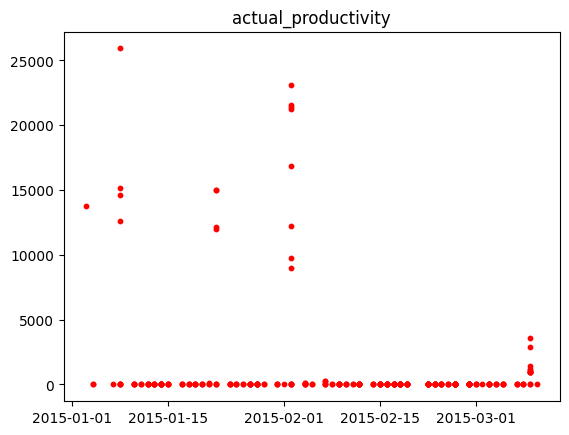

In [739]:
# plot outliers dictionary columns 1 on x axis and column 2 on y axis

for key in outliers_dict:
    x = []
    y = []
    for i in outliers_dict[key]:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(y,x,marker='o', color='red', s=10)
    plt.title(key)
    #plt.show()




array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'team'}>,
        <AxesSubplot: title={'center': 'targeted_productivity'}>],
       [<AxesSubplot: title={'center': 'smv'}>,
        <AxesSubplot: title={'center': 'wip'}>,
        <AxesSubplot: title={'center': 'over_time'}>],
       [<AxesSubplot: title={'center': 'incentive'}>,
        <AxesSubplot: title={'center': 'idle_time'}>,
        <AxesSubplot: title={'center': 'idle_men'}>],
       [<AxesSubplot: title={'center': 'no_of_style_change'}>,
        <AxesSubplot: title={'center': 'no_of_workers'}>,
        <AxesSubplot: title={'center': 'actual_productivity'}>]],
      dtype=object)

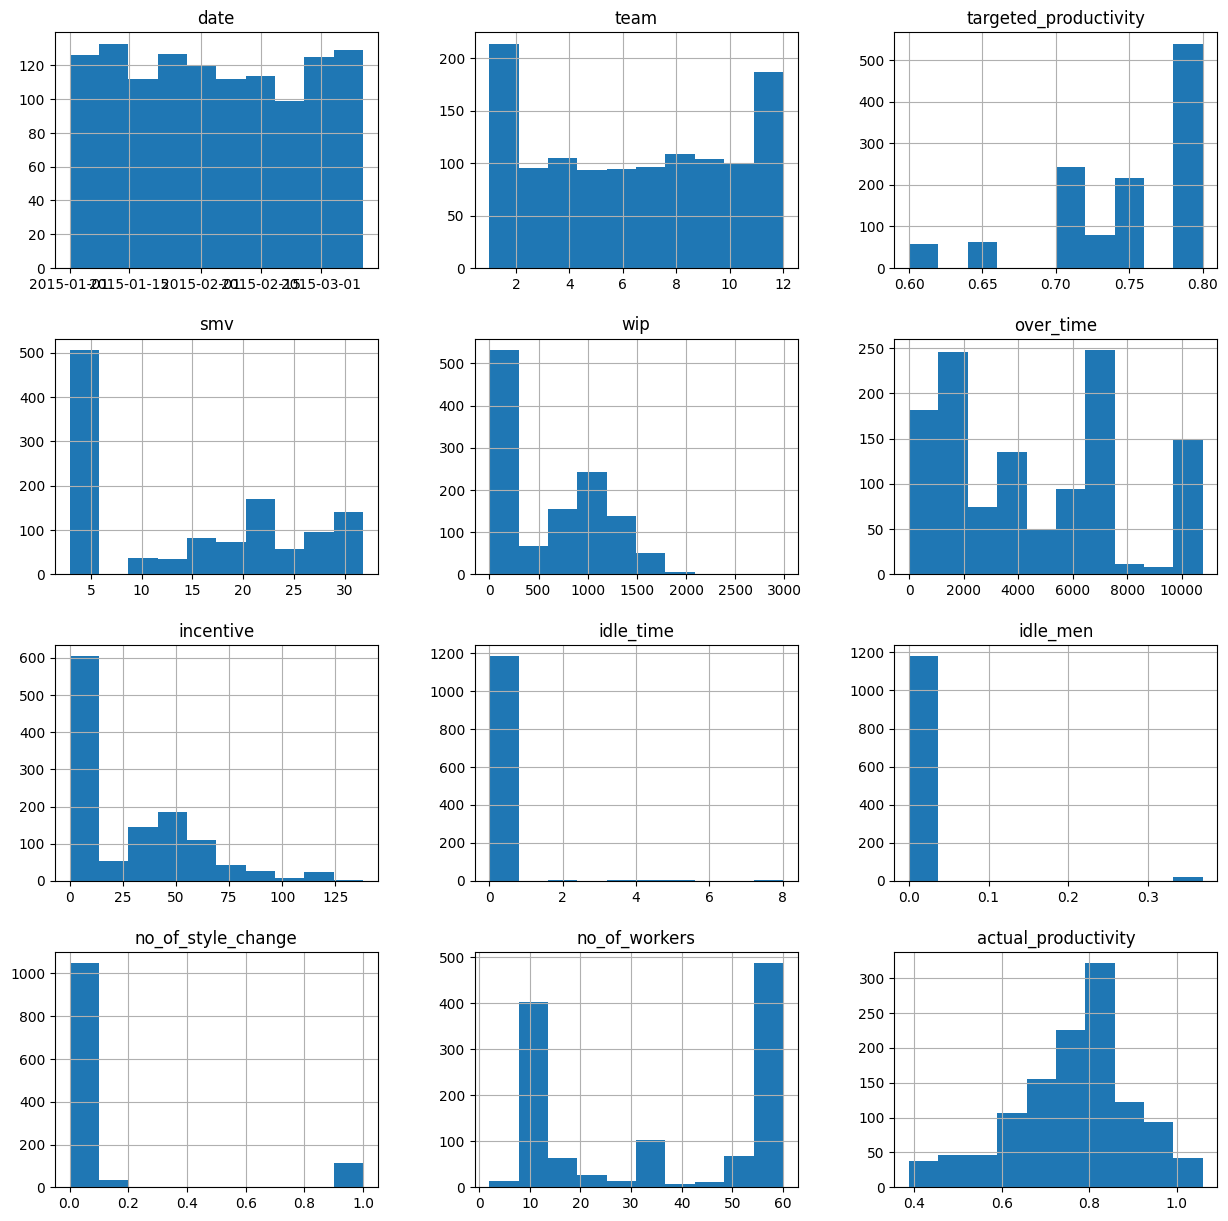

In [740]:
# plot histograms for each column in the dataframe
updated_df.hist(figsize=(15,15))

In [741]:
updated_df[(updated_df["date"] == '2015-01-08')].head()

date   quarter department       day  team  targeted_productivity  \
126 2015-01-08  Quarter2  finishing  Thursday     1                    0.8   
127 2015-01-08  Quarter2  finishing  Thursday     4                    0.8   
128 2015-01-08  Quarter2     sweing  Thursday     9                    0.8   
129 2015-01-08  Quarter2  finishing  Thursday     9                    0.8   
130 2015-01-08  Quarter2     sweing  Thursday     1                    0.8   

       smv     wip     over_time  incentive  idle_time  idle_men  \
126   3.94     0.0   1440.000000        0.0        0.0       0.0   
127   3.94     0.0   4567.460317        0.0        0.0       0.0   
128  26.16  1216.0  10620.000000       88.0        0.0       0.0   
129   3.94     0.0   1440.000000        0.0        0.0       0.0   
130  26.16  1189.0  10620.000000       75.0        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  
126                 0.0            8.0             0.947689  
127                 0.0           20.0             0.919905  
128                 0.0           59.0             0.900216  
129                 0.0            8.0             0.891723  
130                 0.0           59.0             0.850502

In [742]:
df[(df["date"] == '2015-01-08')].head()

date   quarter department       day  team  targeted_productivity  \
126 2015-01-08  Quarter2  finishing  Thursday     1                    0.8   
127 2015-01-08  Quarter2  finishing  Thursday     4                    0.8   
128 2015-01-08  Quarter2     sweing  Thursday     9                    0.8   
129 2015-01-08  Quarter2  finishing  Thursday     9                    0.8   
130 2015-01-08  Quarter2     sweing  Thursday     1                    0.8   

       smv     wip  over_time  incentive  idle_time  idle_men  \
126   3.94     NaN       1440          0        0.0         0   
127   3.94     NaN      12600          0        0.0         0   
128  26.16  1216.0      10620         88        0.0         0   
129   3.94     NaN       1440          0        0.0         0   
130  26.16  1189.0      10620         75        0.0         0   

     no_of_style_change  no_of_workers  actual_productivity  
126                   0            8.0             0.947689  
127                   0           20.0             0.919905  
128                   0           59.0             0.900216  
129                   0            8.0             0.891723  
130                   0           59.0             0.850502

In [743]:
sewing = df[df['department'] == 'sweing']
finishing = df[df['department'] == 'finishing']

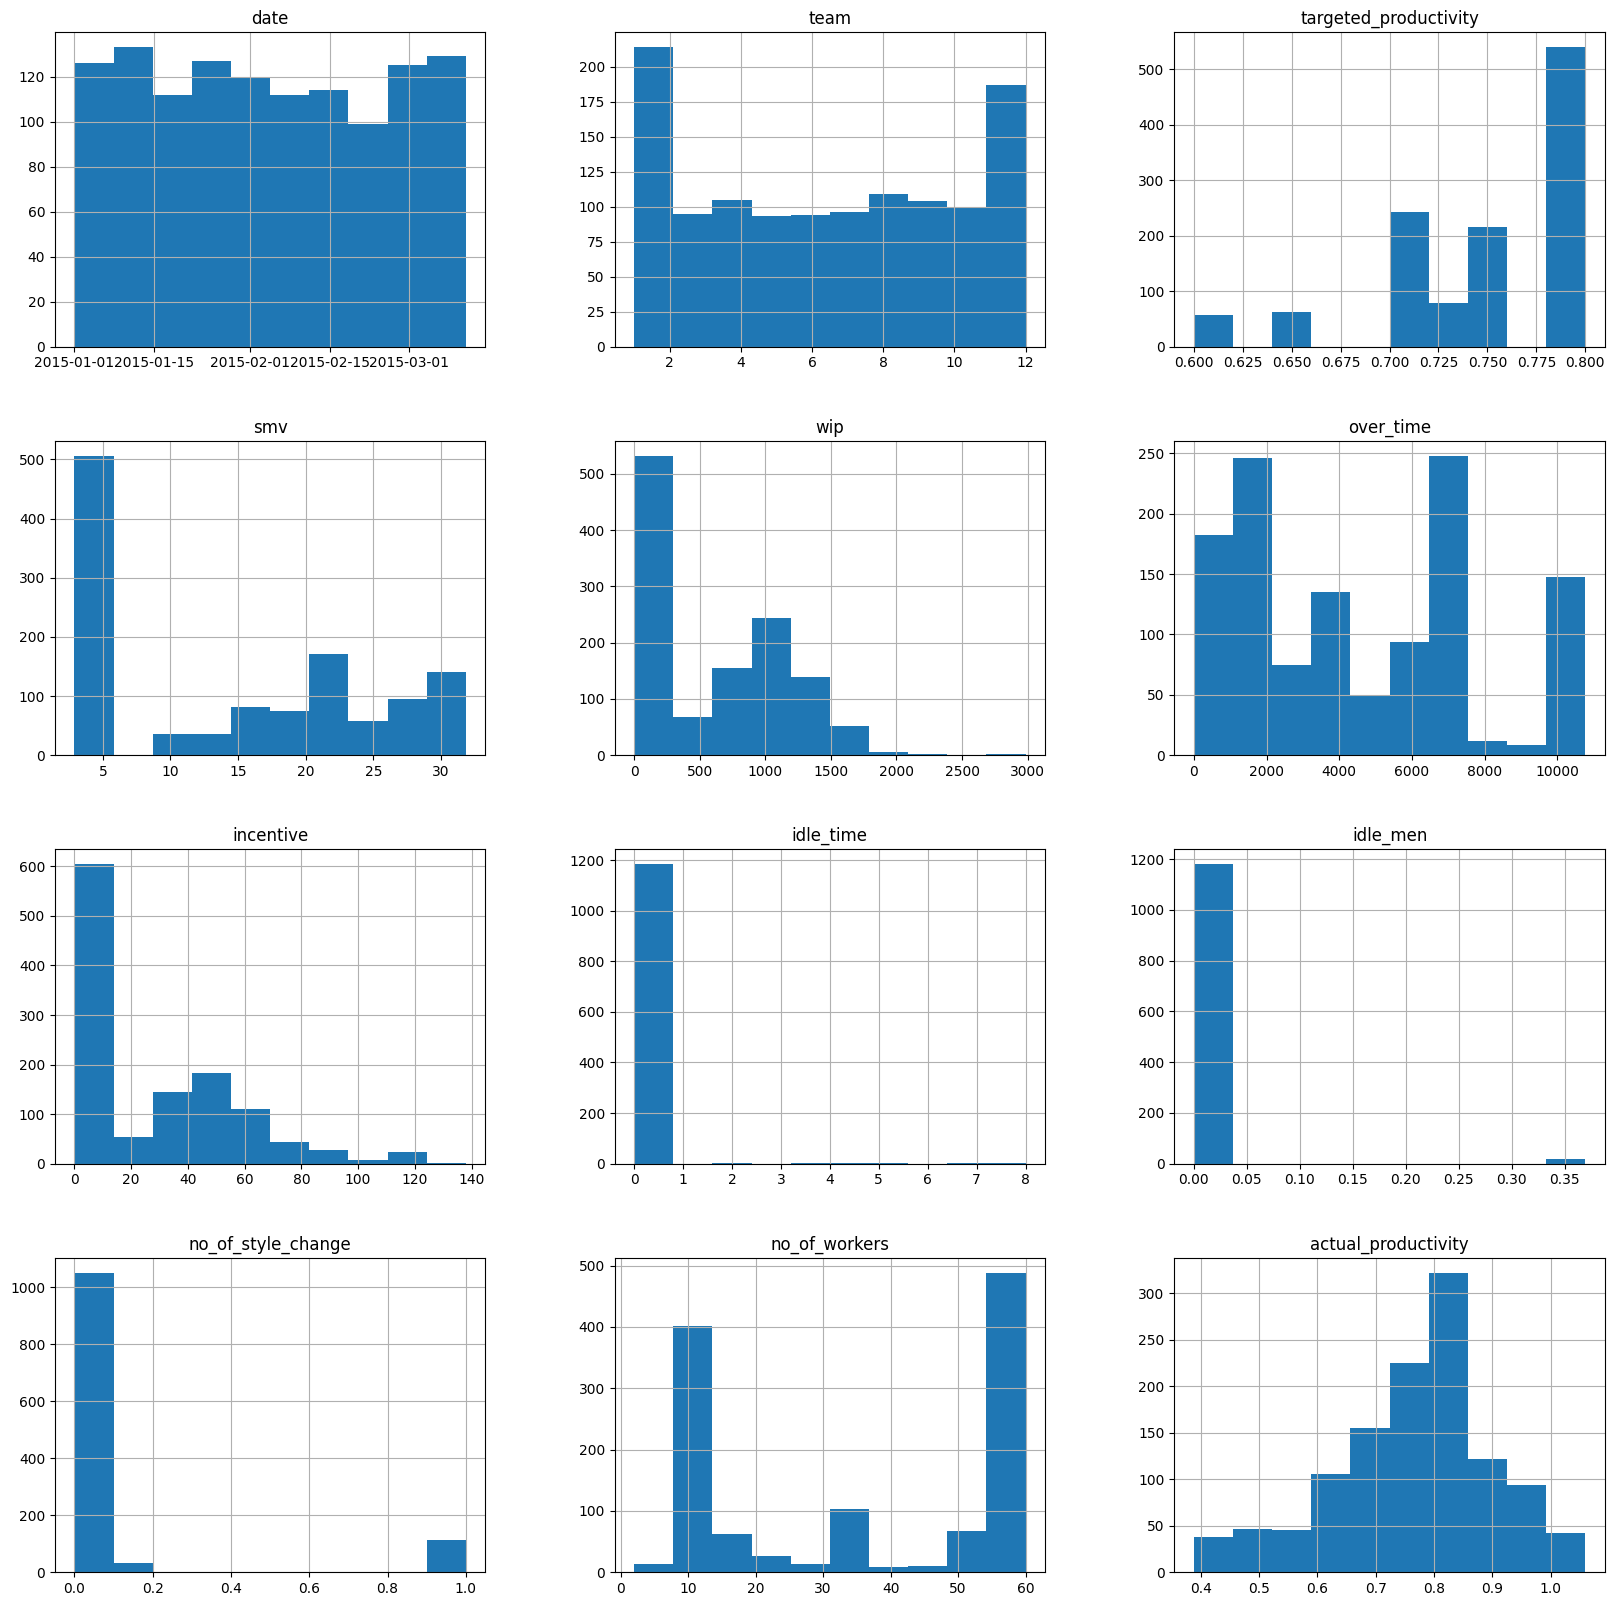

In [744]:
# plot all the columns in the dataset to see the distribution of the data

updated_df.hist(figsize=(20,20))

plt.show()

## 2. Does the individual teams’ actual productivity exceed their targeted productivity, and which team is the most/worst productive? <a class="anchor" id="2"></a>

In [745]:
df.head(100)

date   quarter department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2  2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1     sweing  Thursday     6                   0.80   
..        ...       ...        ...       ...   ...                    ...   
95 2015-01-06  Quarter1     sweing   Tuesday    12                   0.80   
96 2015-01-06  Quarter1     sweing   Tuesday     7                   0.80   
97 2015-01-06  Quarter1     sweing   Tuesday     8                   0.80   
98 2015-01-06  Quarter1     sweing   Tuesday     6                   0.80   
99 2015-01-06  Quarter1     sweing   Tuesday    10                   0.75   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
..    ...     ...        ...        ...        ...       ...   
95  11.61  1101.0       5310         50        0.0         0   
96  25.90  1035.0      10170         38        0.0         0   
97  25.90  1083.0      10170         38        0.0         0   
98  11.61   910.0       4470         38        0.0         0   
99  28.08  1209.0      10530         45        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
..                 ...            ...                  ...  
95                   0           31.5             0.800141  
96                   0           56.5             0.800129  
97                   0           56.5             0.800129  
98                   0           31.5             0.800077  
99                   0           58.5             0.750545  

[100 rows x 15 columns]

In [746]:
df.head(5)

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

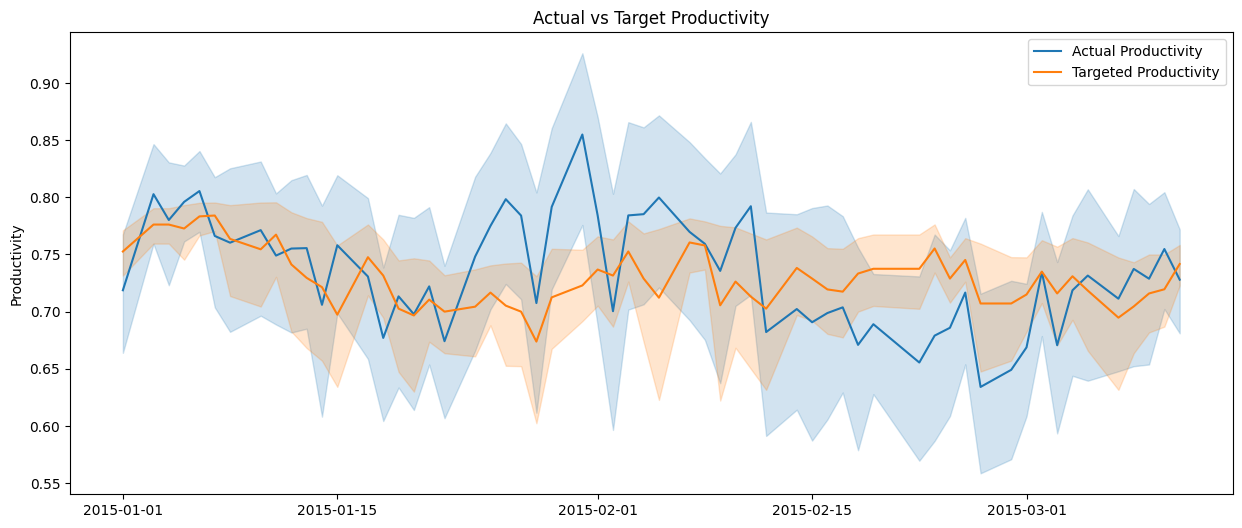

In [747]:
# plot the team's actual productivity vs target productivity

plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y='actual_productivity', data=df, label='Actual Productivity')
sns.lineplot(x='date' , y='targeted_productivity', data=df, label='Targeted Productivity')
plt.title('Actual vs Target Productivity')
plt.ylabel('Productivity')
plt.xlabel('')
plt.show()


In [748]:
df.head(5)

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

the overall productivity of all team combined hits the target  amount of times

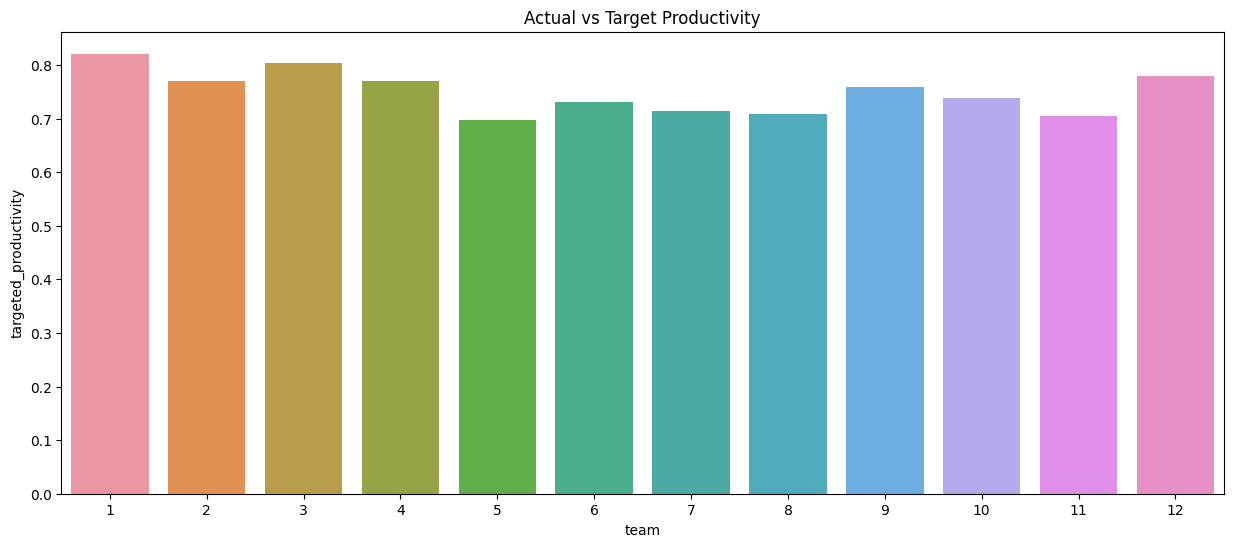

In [749]:
df_team = df.groupby(['team']).mean().reset_index().copy()

# plot the team's actual productivity vs target productivity
bar_width = 0.35

plt.figure(figsize=(15,6))
sns.barplot(x='team' , y='actual_productivity', data=df_team, label='Actual Productivity')
sns.barplot(x='team' , y='targeted_productivity', data=df_team, label='Targeted Productivity')
plt.title('Actual vs Target Productivity')
plt.show()

In [750]:
df_team.describe()

team  targeted_productivity        smv          wip    over_time  \
count  12.000000              12.000000  12.000000    12.000000    12.000000   
mean    6.500000               0.729063  15.033894  1191.478443  4565.791126   
std     3.605551               0.027073   2.464590   258.777053   695.892459   
min     1.000000               0.673656  10.593737   773.741379  3317.929293   
25%     3.750000               0.712767  13.958822   980.315148  4334.948394   
50%     6.500000               0.734941  15.431967  1239.296610  4627.869231   
75%     9.250000               0.743246  17.008184  1347.033802  4975.632560   
max    12.000000               0.774242  18.220645  1609.196429  5449.714286   

       incentive  idle_time   idle_men  no_of_style_change  no_of_workers  \
count  12.000000  12.000000  12.000000           12.000000      12.000000   
mean   38.170352   0.716895   0.367893            0.150917      34.641154   
std    12.756445   1.134695   0.484452            0.092765       5.122845   
min    15.531250   0.000000   0.000000            0.000000      23.919192   
25%    32.505898   0.000000   0.000000            0.083133      34.340596   
50%    38.060050   0.052544   0.185065            0.132982      35.253269   
75%    47.234946   1.147465   0.578226            0.222039      38.334659   
max    60.932692   2.979167   1.458333            0.284091      39.521053   

       actual_productivity  
count            12.000000  
mean              0.733882  
std               0.053645  
min               0.668006  
25%               0.684535  
50%               0.727099  
75%               0.772905  
max               0.821054

In [751]:
df_team_table = df_team[['team','targeted_productivity','actual_productivity']].copy()
#add a column calculating the percentage difference between target and actual
df_team_table['difference'] = (df_team_table['actual_productivity'] - df_team_table['targeted_productivity'])/df_team_table['targeted_productivity']*100
# sort table in ascending order on difference
df_team_table = df_team_table.sort_values(by=['difference'], ascending=False)
# reduce the number of decimal places to 2

df_team_table = df_team_table.round(2)
df_team_table = df_team_table.set_index('team')


print(df_team_table.style.to_latex(position_float='centering'))

\begin{table}
\centering
\begin{tabular}{lrrr}
 & targeted_productivity & actual_productivity & difference \\
team &  &  &  \\
1 & 0.750000 & 0.820000 & 9.960000 \\
3 & 0.740000 & 0.800000 & 8.320000 \\
4 & 0.720000 & 0.770000 & 7.300000 \\
2 & 0.740000 & 0.770000 & 4.180000 \\
5 & 0.670000 & 0.700000 & 3.610000 \\
12 & 0.770000 & 0.780000 & 0.620000 \\
10 & 0.740000 & 0.720000 & -2.540000 \\
11 & 0.700000 & 0.680000 & -3.120000 \\
9 & 0.760000 & 0.730000 & -3.130000 \\
8 & 0.710000 & 0.670000 & -4.820000 \\
6 & 0.730000 & 0.690000 & -6.290000 \\
7 & 0.710000 & 0.670000 & -6.480000 \\
\end{tabular}
\end{table}



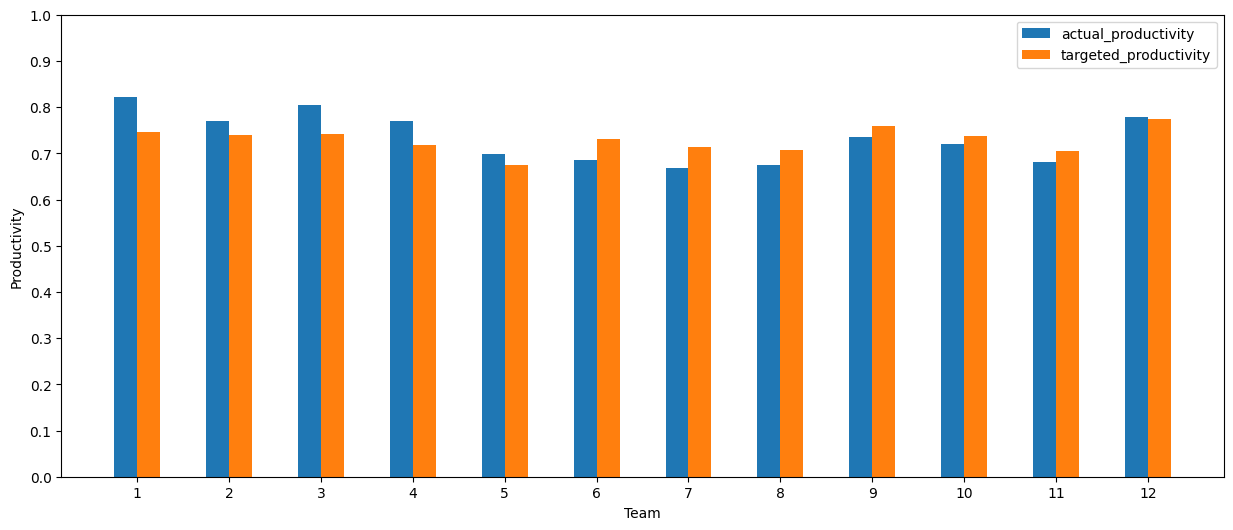

In [752]:
# Set the width of the bars
bar_width = 0.25
plt.figure(figsize=(15,6))
# Plot the bar chart for boys
plt.bar(df_team['team'] - bar_width/2, df_team['actual_productivity'], bar_width, label='actual_productivity')

# Plot the bar chart for girls
plt.bar(df_team['team'] + bar_width/2, df_team['targeted_productivity'], bar_width, label='targeted_productivity')

# Set the x-axis label
plt.xlabel('Team')

# Set the y-axis label
plt.ylabel('Productivity')

# Add a legend to the plot
plt.legend()

# Set the x-axis ticks
plt.xticks(np.arange(min(df_team['team']), max(df['team']) + 1, 1))

plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig('team_actual_vs_target.png', bbox_inches='tight')
# Show the plot
plt.show()



In [753]:
df_team.head(100)
#percentage difference between actual and target productivity


team  targeted_productivity        smv          wip    over_time  \
0      1               0.746667  15.370857  1609.196429  4793.428571   
1      2               0.739908  14.640734  1326.280702  4384.954128   
2      3               0.742105  17.316737  1409.293103  5375.684211   
3      4               0.717619  16.905333  1218.677966  5449.714286   
4      5               0.673656  18.220645   773.741379  5330.967742   
5      6               0.731383  11.913085   936.559322  3369.095745   
6      7               0.714271  17.653958   999.509091  4857.187500   
7      8               0.708257  15.769908   984.375000  4312.293578   
8      9               0.758173  15.493077  1283.724138  4519.038462   
9     10               0.738500  14.738200  1528.333333  4736.700000   
10    11               0.703977  11.790455   968.135593  4342.500000   
11    12               0.774242  10.593737  1259.915254  3317.929293   

    incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0   46.600000   0.000000  0.000000            0.057143      35.042857   
1   38.211009   0.059633  0.275229            0.155963      34.623853   
2   49.557895   0.000000  0.000000            0.263158      39.521053   
3   35.047619   1.428571  0.142857            0.200000      38.200000   
4   49.139785   1.053763  0.537634            0.086022      39.381720   
5   22.702128   0.000000  0.000000            0.074468      25.170213   
6   15.531250   2.979167  1.458333            0.208333      37.098958   
7   24.880734   2.876147  1.073394            0.266055      33.490826   
8   60.932692   0.000000  0.000000            0.105769      35.211538   
9   36.330000   0.160000  0.700000            0.110000      35.295000   
10  37.909091   0.045455  0.227273            0.284091      38.738636   
11  41.202020   0.000000  0.000000            0.000000      23.919192   

    actual_productivity  
0              0.821054  
1              0.770855  
2              0.803880  
3              0.770035  
4              0.697981  
5              0.685385  
6              0.668006  
7              0.674148  
8              0.734462  
9              0.719736  
10             0.681985  
11             0.779055

In [754]:
df_team['percentage_difference'] = (df_team['actual_productivity'] - df_team['targeted_productivity'])/df_team['targeted_productivity'] * 100

df_team.head(100)

team  targeted_productivity        smv          wip    over_time  \
0      1               0.746667  15.370857  1609.196429  4793.428571   
1      2               0.739908  14.640734  1326.280702  4384.954128   
2      3               0.742105  17.316737  1409.293103  5375.684211   
3      4               0.717619  16.905333  1218.677966  5449.714286   
4      5               0.673656  18.220645   773.741379  5330.967742   
5      6               0.731383  11.913085   936.559322  3369.095745   
6      7               0.714271  17.653958   999.509091  4857.187500   
7      8               0.708257  15.769908   984.375000  4312.293578   
8      9               0.758173  15.493077  1283.724138  4519.038462   
9     10               0.738500  14.738200  1528.333333  4736.700000   
10    11               0.703977  11.790455   968.135593  4342.500000   
11    12               0.774242  10.593737  1259.915254  3317.929293   

    incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0   46.600000   0.000000  0.000000            0.057143      35.042857   
1   38.211009   0.059633  0.275229            0.155963      34.623853   
2   49.557895   0.000000  0.000000            0.263158      39.521053   
3   35.047619   1.428571  0.142857            0.200000      38.200000   
4   49.139785   1.053763  0.537634            0.086022      39.381720   
5   22.702128   0.000000  0.000000            0.074468      25.170213   
6   15.531250   2.979167  1.458333            0.208333      37.098958   
7   24.880734   2.876147  1.073394            0.266055      33.490826   
8   60.932692   0.000000  0.000000            0.105769      35.211538   
9   36.330000   0.160000  0.700000            0.110000      35.295000   
10  37.909091   0.045455  0.227273            0.284091      38.738636   
11  41.202020   0.000000  0.000000            0.000000      23.919192   

    actual_productivity  percentage_difference  
0              0.821054               9.962641  
1              0.770855               4.182528  
2              0.803880               8.324231  
3              0.770035               7.304123  
4              0.697981               3.610876  
5              0.685385              -6.289146  
6              0.668006              -6.477281  
7              0.674148              -4.815876  
8              0.734462              -3.127408  
9              0.719736              -2.540799  
10             0.681985              -3.124064  
11             0.779055               0.621638

## 3. Which of the two garment production processes (i.e., sewing and finishing) is the hardest? Justify your answer. <a class="anchor" id="3"></a>

The number of workers in sweing is far exceeds finiesh, looking at the smw task takes far longer to complete. futher one look att idel time home ever there has been relatively little of that other than for sewing between 03feb to 08feb.


over time is much higher in sewing how however if it's avergaged per employee it similar results

Reseacher into what factor make a job harder than others



In [755]:
df.head(5)

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [756]:
# divide overtime by the number of workers then calculate the average overtime per worker per day
overtime_sewing = sewing.copy(deep=True)

overtime_sewing['overtime_per_worker'] = overtime_sewing['over_time']/overtime_sewing['no_of_workers']

overtime_sewing['difference'] = overtime_sewing['actual_productivity'] / overtime_sewing['targeted_productivity'] * 100

overtime_sewing = overtime_sewing.groupby('date').mean()

overtime_sewing.head(1)


team  targeted_productivity        smv    wip  over_time  \
date                                                                   
2015-01-01   6.5                 0.7625  21.608333  865.5     5590.0   

            incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                                            
2015-01-01      45.75        0.0       0.0                 0.0      50.333333   

            actual_productivity  overtime_per_worker  difference  
date                                                              
2015-01-01             0.755095           111.948052   98.774913

In [757]:
# divide overtime by the number of workers then calulate the average overtime per worker per day
overtime_finishing = finishing.copy(deep=True)

overtime_finishing['overtime_per_worker'] = overtime_finishing['over_time']/overtime_finishing['no_of_workers']

overtime_finishing['difference'] = overtime_finishing['actual_productivity'] / overtime_finishing['targeted_productivity'] * 100

overtime_finishing = overtime_finishing.groupby('date').mean()

overtime_finishing.head(5)

team  targeted_productivity       smv  wip    over_time  \
date                                                                      
2015-01-01  6.142857               0.735714  3.672857  NaN  1200.000000   
2015-01-03  6.111111               0.777778  3.802222  NaN  2173.333333   
2015-01-04  6.111111               0.777778  3.755556  NaN  2026.666667   
2015-01-05  6.000000               0.770000  3.545000  NaN  1680.000000   
2015-01-06  6.111111               0.788889  3.755556  NaN  1953.333333   

            incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                                            
2015-01-01        0.0        0.0       0.0                 0.0      10.000000   
2015-01-03        0.0        0.0       0.0                 0.0      10.333333   
2015-01-04        0.0        0.0       0.0                 0.0      10.444444   
2015-01-05        0.0        0.0       0.0                 0.0       9.000000   
2015-01-06        0.0        0.0       0.0                 0.0      10.111111   

            actual_productivity  overtime_per_worker  difference  
date                                                              
2015-01-01             0.656337           120.000000   89.530177  
2015-01-03             0.835364           175.196078  107.602956  
2015-01-04             0.771936           165.000000   99.236537  
2015-01-05             0.815877           180.000000  106.513924  
2015-01-06             0.829126           187.407407  105.222991

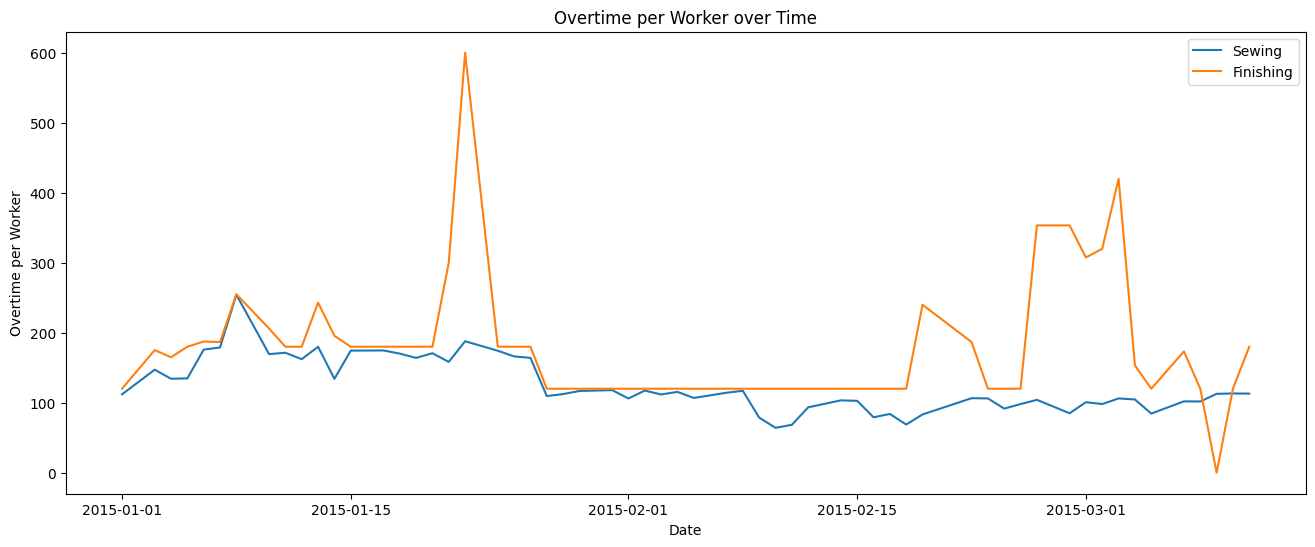

In [758]:
plt.figure(figsize=(16,6))
plt.plot(overtime_sewing.index, overtime_sewing['overtime_per_worker'], label='Sewing')
plt.plot(overtime_finishing.index, overtime_finishing['overtime_per_worker'], label='Finishing')
plt.xlabel('Date')
plt.ylabel('Overtime per Worker')
plt.title('Overtime per Worker over Time')
plt.legend()

In [759]:
overtime_finishing.describe()

team  targeted_productivity        smv  wip    over_time  \
count  59.000000              59.000000  59.000000  0.0    59.000000   
mean    6.333788               0.737554   3.890464  NaN  1890.124147   
std     0.588176               0.026509   0.232262  NaN  1204.222520   
min     5.500000               0.666667   3.528571  NaN     0.000000   
25%     6.000000               0.718466   3.760505  NaN  1302.857143   
50%     6.222222               0.735714   3.862857  NaN  1584.000000   
75%     6.545455               0.757143   3.930260  NaN  2029.047619   
max     8.428571               0.788889   4.702500  NaN  8940.000000   

         incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
count    59.000000       59.0      59.0                59.0      59.000000   
mean     25.423729        0.0       0.0                 0.0      10.361516   
std     195.283366        0.0       0.0                 0.0       1.141957   
min       0.000000        0.0       0.0                 0.0       8.250000   
25%       0.000000        0.0       0.0                 0.0       9.527273   
50%       0.000000        0.0       0.0                 0.0      10.333333   
75%       0.000000        0.0       0.0                 0.0      11.142857   
max    1500.000000        0.0       0.0                 0.0      14.900000   

       actual_productivity  overtime_per_worker  difference  
count            59.000000            59.000000   59.000000  
mean              0.752064           176.635208  104.225619  
std               0.077815            91.777585   12.259087  
min               0.580717             0.000000   81.894173  
25%               0.698388           120.000000   96.056285  
50%               0.759699           165.000000  103.967732  
75%               0.806503           183.333333  112.048421  
max               0.971867           600.000000  134.643575

In [760]:
overtime_sewing.describe()

team  targeted_productivity        smv           wip  \
count  59.000000              59.000000  59.000000     59.000000   
mean    6.521109               0.723739  23.236816   1187.246790   
std     0.172351               0.027364   0.995297   1429.726339   
min     5.900000               0.677273  20.678182    779.666667   
25%     6.500000               0.700000  22.641250    913.886364   
50%     6.500000               0.720833  23.226364    976.090909   
75%     6.500000               0.740909  23.881667   1059.333333   
max     7.000000               0.787500  26.172500  11933.000000   

          over_time  incentive  idle_time   idle_men  no_of_style_change  \
count     59.000000  59.000000  59.000000  59.000000           59.000000   
mean    6491.302517  44.404854   1.236518   0.637776            0.262840   
std     2002.458617   9.456597   6.656876   1.556920            0.382219   
min     3310.000000  23.272727   0.000000   0.000000            0.000000   
25%     5229.000000  38.083333   0.000000   0.000000            0.000000   
50%     5865.000000  45.416667   0.000000   0.000000            0.000000   
75%     8644.090909  51.125000   0.000000   0.000000            0.500000   
max    12377.500000  65.272727  47.500000   6.833333            1.250000   

       no_of_workers  actual_productivity  overtime_per_worker  difference  
count      59.000000            59.000000            59.000000   59.000000  
mean       52.439484             0.721645           124.722468  100.346644  
std         0.990317             0.039818            38.090506    9.048856  
min        50.333333             0.621448            64.158215   84.108476  
25%        52.125000             0.700266           101.864125   96.387641  
50%        52.500000             0.722947           112.720761  100.442505  
75%        52.895833             0.753435           163.087223  102.673388  
max        57.625000             0.787794           254.316239  157.690359

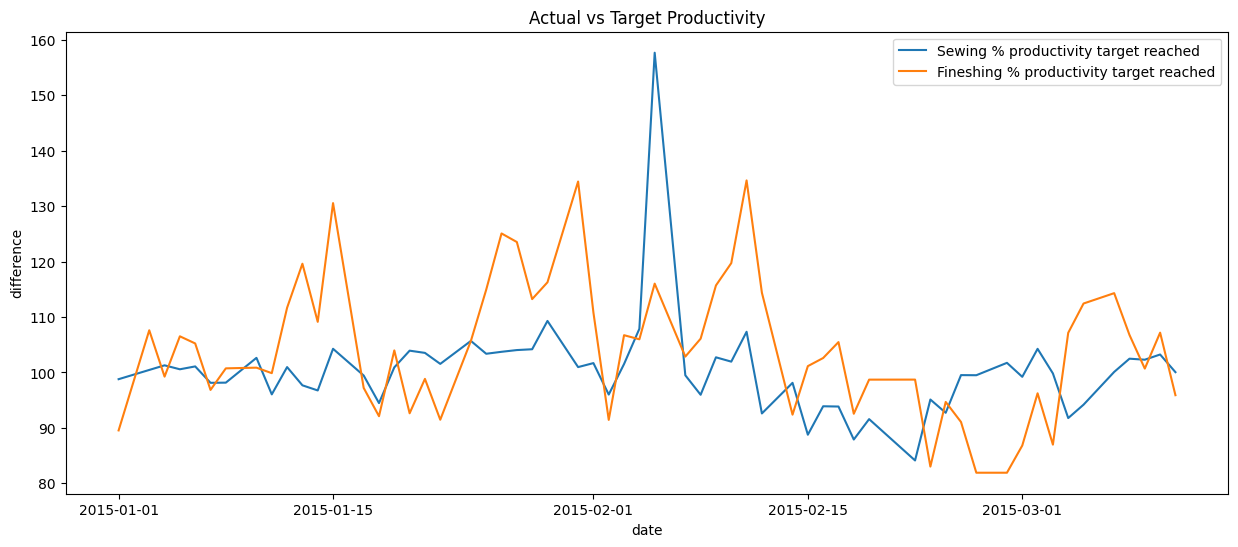

In [761]:
# plot the team's actual productivity vs target productivity
plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y= 'difference', data=overtime_sewing, label='Sewing % productivity target reached')
sns.lineplot(x='date' , y= 'difference', data=overtime_finishing, label='Fineshing % productivity target reached')
plt.title('Actual vs Target Productivity')
plt.savefig('actual_vs_target_productivity.png', bbox_inches='tight')
plt.show()

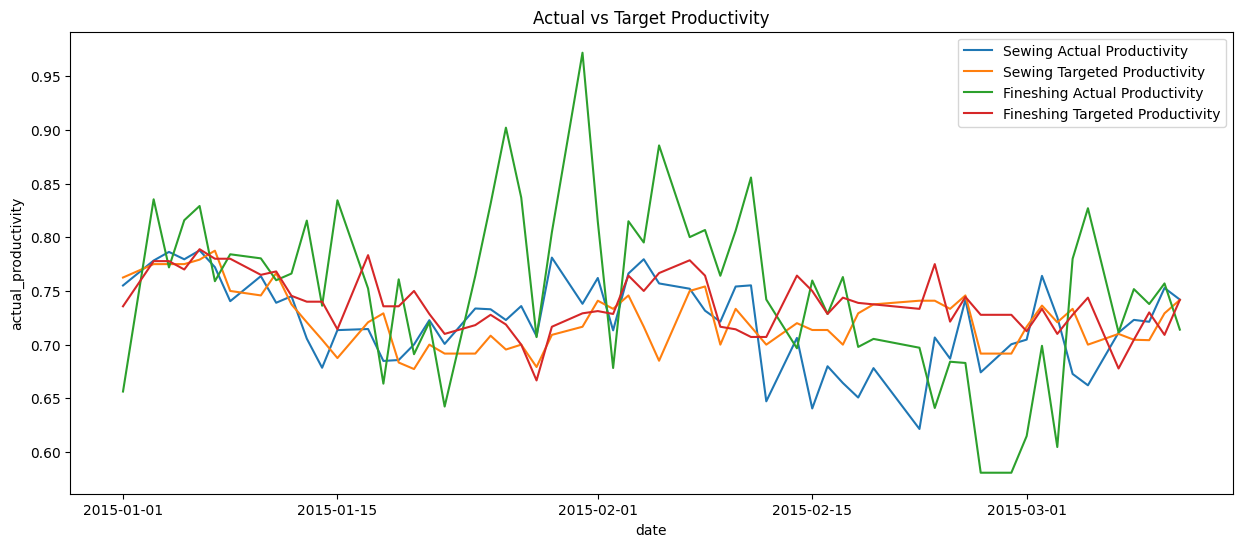

In [762]:
# plot the team's actual productivity vs target productivity
plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y= 'actual_productivity', data=sewing, label='Sewing Actual Productivity',ci=None)
sns.lineplot(x='date' , y= 'targeted_productivity', data=sewing, label='Sewing Targeted Productivity',ci=None)
sns.lineplot(x='date' , y= 'actual_productivity', data=finishing, label='Fineshing Actual Productivity',ci=None)
sns.lineplot(x='date' , y= 'targeted_productivity', data=finishing, label='Fineshing Targeted Productivity',ci=None)
plt.title('Actual vs Target Productivity')
plt.show()

## 4. Which of the days is mostly the rest day for the workers and how does the resting affect their productivity afterwards? <a class="anchor" id="4"></a>


Rest day is primary friday

little to no difference 




In [763]:
df.head(100)

date   quarter department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2  2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1     sweing  Thursday     6                   0.80   
..        ...       ...        ...       ...   ...                    ...   
95 2015-01-06  Quarter1     sweing   Tuesday    12                   0.80   
96 2015-01-06  Quarter1     sweing   Tuesday     7                   0.80   
97 2015-01-06  Quarter1     sweing   Tuesday     8                   0.80   
98 2015-01-06  Quarter1     sweing   Tuesday     6                   0.80   
99 2015-01-06  Quarter1     sweing   Tuesday    10                   0.75   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
..    ...     ...        ...        ...        ...       ...   
95  11.61  1101.0       5310         50        0.0         0   
96  25.90  1035.0      10170         38        0.0         0   
97  25.90  1083.0      10170         38        0.0         0   
98  11.61   910.0       4470         38        0.0         0   
99  28.08  1209.0      10530         45        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
..                 ...            ...                  ...  
95                   0           31.5             0.800141  
96                   0           56.5             0.800129  
97                   0           56.5             0.800129  
98                   0           31.5             0.800077  
99                   0           58.5             0.750545  

[100 rows x 15 columns]

In [764]:
df['day'].unique()
# missing values in the day column

# fill the missing values in the day column with the mode

df['day'].fillna(df['day'].mode()[0], inplace=True)

df['day'].isnull().sum()

df.head(100)



date   quarter department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2  2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1     sweing  Thursday     6                   0.80   
..        ...       ...        ...       ...   ...                    ...   
95 2015-01-06  Quarter1     sweing   Tuesday    12                   0.80   
96 2015-01-06  Quarter1     sweing   Tuesday     7                   0.80   
97 2015-01-06  Quarter1     sweing   Tuesday     8                   0.80   
98 2015-01-06  Quarter1     sweing   Tuesday     6                   0.80   
99 2015-01-06  Quarter1     sweing   Tuesday    10                   0.75   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
..    ...     ...        ...        ...        ...       ...   
95  11.61  1101.0       5310         50        0.0         0   
96  25.90  1035.0      10170         38        0.0         0   
97  25.90  1083.0      10170         38        0.0         0   
98  11.61   910.0       4470         38        0.0         0   
99  28.08  1209.0      10530         45        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
..                 ...            ...                  ...  
95                   0           31.5             0.800141  
96                   0           56.5             0.800129  
97                   0           56.5             0.800129  
98                   0           31.5             0.800077  
99                   0           58.5             0.750545  

[100 rows x 15 columns]

In [765]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

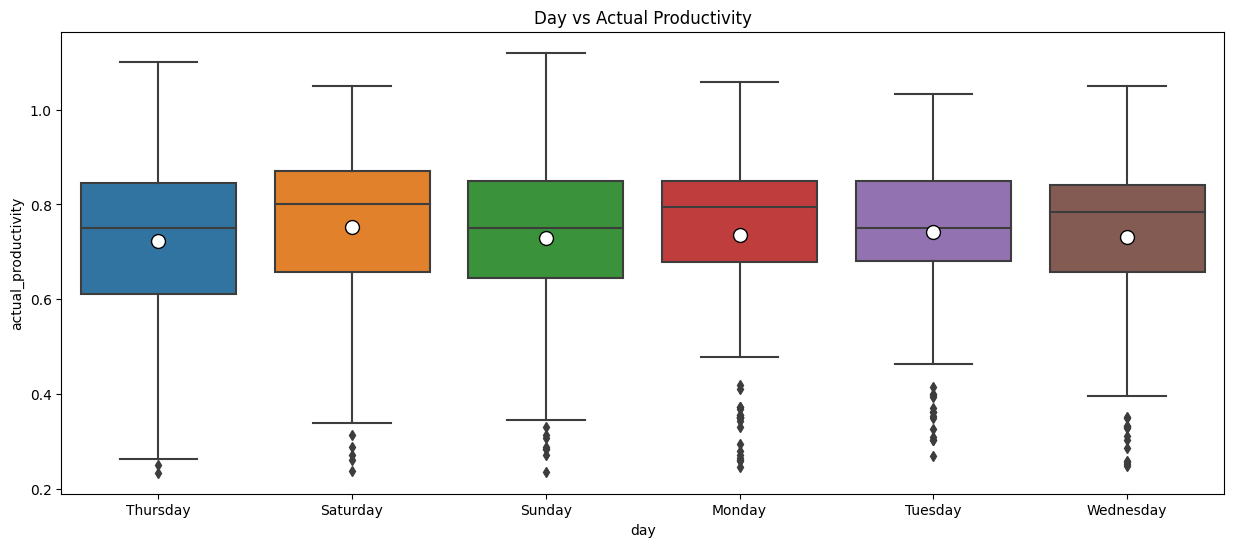

In [766]:
# create a seaborn boxplot for day column vs actual productivity mean for each day of the week
# maybe remove the outliers from the dataset before plotting the boxplot   (optional)



plt.figure(figsize=(15,6))
sns.boxplot(x='day', y='actual_productivity', data=df, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'10'}, meanline=False, showfliers=True )
plt.title('Day vs Actual Productivity')
plt.savefig('day_vs_actual_boxplot.png',bbox_inches='tight')
plt.show()


In [767]:
df_day = df.groupby(['day']).median().reset_index().copy()
df_day.head(100)

day  team  targeted_productivity    smv     wip  over_time  \
0     Monday   7.0                   0.75  15.26  1076.0     3840.0   
1   Saturday   6.0                   0.75  11.61  1033.0     4200.0   
2     Sunday   7.0                   0.75  15.26  1049.0     3960.0   
3   Thursday   6.0                   0.75  15.26   999.5     4320.0   
4    Tuesday   6.0                   0.75  15.26  1057.5     3840.0   
5  Wednesday   6.5                   0.75  15.26   992.0     3450.0   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0       30.0        0.0       0.0                 0.0           34.0   
1        0.0        0.0       0.0                 0.0           33.0   
2        0.0        0.0       0.0                 0.0           34.0   
3        0.0        0.0       0.0                 0.0           34.0   
4       23.0        0.0       0.0                 0.0           34.0   
5        0.0        0.0       0.0                 0.0           34.0   

   actual_productivity  
0             0.795417  
1             0.800117  
2             0.750651  
3             0.750651  
4             0.750797  
5             0.783212

In [768]:
df_day_mean = df.groupby(['day']).mean().reset_index().copy()

In [769]:
# calculate the percentage difference between the actual productivity total and the day with the highest productivity

df_day['percentage_difference'] = (df_day['actual_productivity'] - df_day['actual_productivity'].min())/df_day['actual_productivity'].min() * 100
df_day.head(100)



day  team  targeted_productivity    smv     wip  over_time  \
0     Monday   7.0                   0.75  15.26  1076.0     3840.0   
1   Saturday   6.0                   0.75  11.61  1033.0     4200.0   
2     Sunday   7.0                   0.75  15.26  1049.0     3960.0   
3   Thursday   6.0                   0.75  15.26   999.5     4320.0   
4    Tuesday   6.0                   0.75  15.26  1057.5     3840.0   
5  Wednesday   6.5                   0.75  15.26   992.0     3450.0   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0       30.0        0.0       0.0                 0.0           34.0   
1        0.0        0.0       0.0                 0.0           33.0   
2        0.0        0.0       0.0                 0.0           34.0   
3        0.0        0.0       0.0                 0.0           34.0   
4       23.0        0.0       0.0                 0.0           34.0   
5        0.0        0.0       0.0                 0.0           34.0   

   actual_productivity  percentage_difference  
0             0.795417               5.963578  
1             0.800117               6.589759  
2             0.750651               0.000000  
3             0.750651               0.000000  
4             0.750797               0.019450  
5             0.783212               4.337674

In [770]:
# calculate the percentage difference between the actual productivity total and the day with the highest productivity

df_day_mean['percentage_difference'] = (df_day_mean['actual_productivity'] - df_day_mean['actual_productivity'].min())/df_day_mean['actual_productivity'].min() * 100
df_day_mean.head(100)


day      team  targeted_productivity        smv          wip  \
0     Monday  6.577889               0.729397  15.069648  2156.310345   
1   Saturday  6.374332               0.733690  14.634920  1003.019231   
2     Sunday  6.433498               0.737438  15.159360  1016.198276   
3   Thursday  6.336683               0.720704  15.132764   974.025424   
4    Tuesday  6.437811               0.727612  15.291045  1012.483051   
5  Wednesday  6.399038               0.729087  15.055577   973.773109   

     over_time   incentive  idle_time  idle_men  no_of_style_change  \
0  4357.688442  100.266332   0.010050  0.050251            0.145729   
1  4697.112299   26.657754   3.048128  0.438503            0.139037   
2  4584.088670   24.167488   0.086207  0.443350            0.118227   
3  5202.663317   26.160804   0.062814  0.376884            0.170854   
4  4439.402985   26.741294   0.097015  0.472637            0.159204   
5  4151.394231   25.543269   1.213942  0.432692            0.168269   

   no_of_workers  actual_productivity  percentage_difference  
0      34.899497             0.735488               1.777870  
1      33.497326             0.751929               4.052909  
2      34.283251             0.728604               0.825202  
3      35.364322             0.722641               0.000000  
4      34.982587             0.742701               2.775934  
5      34.569712             0.730462               1.082284

In [771]:
# concatinate df_day and df_day_mean into a single dataframe onlly keeping the day and percentage difference columns

new_df_day = pd.concat([df_day[['day', 'percentage_difference']], df_day_mean[['day', 'percentage_difference']]], axis=1).round(2)

#new_df_day['Day', 'Median','remove', 'Mean'] = new_df_day['day', 'percentage_difference','day', 'percentage_difference']
new_df_day.head(100)
# latex table for the new_df_day dataframe

print(new_df_day.style.to_latex(position_float='centering', caption='Day vs Actual Productivity', label='tab:day_vs_actual_productivity'))

\begin{table}
\centering
\caption{Day vs Actual Productivity}
\label{tab:day_vs_actual_productivity}
\begin{tabular}{llrlr}
 & day & percentage_difference & day & percentage_difference \\
0 & Monday & 5.960000 & Monday & 1.780000 \\
1 & Saturday & 6.590000 & Saturday & 4.050000 \\
2 & Sunday & 0.000000 & Sunday & 0.830000 \\
3 & Thursday & 0.000000 & Thursday & 0.000000 \\
4 & Tuesday & 0.020000 & Tuesday & 2.780000 \\
5 & Wednesday & 4.340000 & Wednesday & 1.080000 \\
\end{tabular}
\end{table}



In [772]:
# with mean of actual productivity for each day of the week in descending order we can see that the highest productivity is on Saturday and the lowest is on Thursday. 
# The difference between the highest and lowest is 0.02 or 2% which is not much.
print(df_day[['day','actual_productivity']].sort_values(by='actual_productivity', ascending=False))

         day  actual_productivity
1   Saturday             0.800117
0     Monday             0.795417
5  Wednesday             0.783212
4    Tuesday             0.750797
2     Sunday             0.750651
3   Thursday             0.750651


The variation between day accounting for actual productivity, using the mean "the green arrow" in the boxplot that the day follow friday the rest day. There is on average a higher productivity in the following day sat

## 5 . When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives? <a class="anchor" id="5"></a>

In [773]:
sewing.describe()

team  targeted_productivity         smv           wip  \
count  691.000000             691.000000  691.000000    691.000000   
mean     6.520984               0.723980   23.245412   1190.465991   
std      3.458333               0.102006    6.976497   1837.455001   
min      1.000000               0.070000   10.050000      7.000000   
25%      4.000000               0.700000   18.790000    774.500000   
50%      6.000000               0.750000   22.520000   1039.000000   
75%     10.000000               0.800000   28.080000   1252.500000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time   incentive   idle_time    idle_men  no_of_style_change  \
count    691.000000  691.000000  691.000000  691.000000          691.000000   
mean    6508.205499   44.483357    1.264834    0.639653            0.260492   
std     2864.505604   27.596591   16.712923    4.283652            0.537185   
min        0.000000    0.000000    0.000000    0.000000            0.000000   
25%     4560.000000   30.000000    0.000000    0.000000            0.000000   
50%     6840.000000   45.000000    0.000000    0.000000            0.000000   
75%     7200.000000   60.000000    0.000000    0.000000            0.000000   
max    25920.000000  138.000000  300.000000   45.000000            2.000000   

       no_of_workers  actual_productivity  
count     691.000000           691.000000  
mean       52.445731             0.722013  
std         9.417353             0.154784  
min        26.000000             0.233705  
25%        52.000000             0.661470  
50%        57.000000             0.750608  
75%        58.000000             0.800402  
max        89.000000             1.100484

In [774]:
finishing.describe()

team  targeted_productivity         smv  wip     over_time  \
count  506.000000             506.000000  506.000000  0.0    506.000000   
mean     6.298419               0.737352    3.887036  NaN   1917.154150   
std      3.470937               0.091512    0.594110  NaN   1776.698408   
min      1.000000               0.350000    2.900000  NaN      0.000000   
25%      3.000000               0.700000    3.900000  NaN    960.000000   
50%      6.000000               0.750000    3.940000  NaN   1440.000000   
75%      9.000000               0.800000    4.150000  NaN   1920.000000   
max     12.000000               0.800000    5.130000  NaN  15000.000000   

         incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
count   506.000000      506.0     506.0               506.0     506.000000   
mean     29.644269        0.0       0.0                 0.0      10.252964   
std     244.130042        0.0       0.0                 0.0       4.007819   
min       0.000000        0.0       0.0                 0.0       2.000000   
25%       0.000000        0.0       0.0                 0.0       8.000000   
50%       0.000000        0.0       0.0                 0.0       8.000000   
75%       0.000000        0.0       0.0                 0.0      11.750000   
max    3600.000000        0.0       0.0                 0.0      28.000000   

       actual_productivity  
count           506.000000  
mean              0.752951  
std               0.197021  
min               0.235795  
25%               0.631606  
50%               0.805909  
75%               0.906364  
max               1.120437

In [775]:
new_sewing = sewing.groupby(['team']).mean().reset_index().copy()
new_sewing["avg_incentive"] = new_sewing["incentive"]/new_sewing["no_of_workers"]
new_sewing.head(12)

team  targeted_productivity        smv          wip    over_time  \
0      1               0.743750  25.372857  1609.196429  7335.535714   
1      2               0.728070  24.304561  1326.280702  6575.789474   
2      3               0.743103  25.559828  1409.293103  7035.000000   
3      4               0.716949  26.824746  1218.677966  7547.796610   
4      5               0.681897  26.699138   773.741379  7271.379310   
5      6               0.736441  17.242203   936.559322  4461.610169   
6      7               0.702182  27.950545   999.509091  7064.181818   
7      8               0.703571  27.128571   984.375000  6896.785714   
8      9               0.743966  24.903276  1283.724138  7103.793103   
9     10               0.727193  23.099474  1528.333333  6794.210526   
10    11               0.688136  15.807288   968.135593  5665.423729   
11    12               0.771186  14.833898  1259.915254  4490.423729   

    incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0   70.232143   0.000000  0.000000            0.107143      57.241071   
1   52.017544   0.114035  0.526316            0.298246      55.561404   
2   56.344828   0.000000  0.000000            0.431034      56.922414   
3   46.101695   2.542373  0.254237            0.355932      57.491525   
4   29.137931   1.689655  0.862069            0.137931      57.267241   
5   36.169492   0.000000  0.000000            0.118644      34.762712   
6   27.109091   5.200000  2.545455            0.363636      57.354545   
7   31.285714   5.598214  2.089286            0.517857      56.598214   
8   47.189655   0.000000  0.000000            0.189655      56.103448   
9   46.894737   0.280702  1.228070            0.192982      54.096491   
10  40.271186   0.067797  0.338983            0.423729      53.203390   
11  50.830508   0.000000  0.000000            0.000000      33.915254   

    actual_productivity  avg_incentive  
0              0.815150       1.226954  
1              0.762394       0.936217  
2              0.776163       0.989853  
3              0.730577       0.801887  
4              0.641486       0.508806  
5              0.719471       1.040468  
6              0.654707       0.472658  
7              0.656631       0.552769  
8              0.742341       0.841119  
9              0.716959       0.866872  
10             0.676165       0.756929  
11             0.770054       1.498751

In [776]:

new_finishing = finishing.groupby(['team']).mean().reset_index().copy()
new_finishing["avg_incentive"] = new_finishing["incentive"]/new_finishing["no_of_workers"]
new_finishing.head(15)



team  targeted_productivity       smv  wip    over_time  incentive  \
0      1               0.750000  3.940000  NaN  1888.163265  19.591837   
1      2               0.752885  4.047692  NaN  1983.461538  23.076923   
2      3               0.740541  4.395135  NaN  2774.594595  38.918919   
3      4               0.718478  4.182609  NaN  2758.695652  20.869565   
4      5               0.660000  4.170571  NaN  2115.428571  82.285714   
5      6               0.722857  2.929714  NaN  1527.428571   0.000000   
6      7               0.730488  3.841463  NaN  1896.585366   0.000000   
7      8               0.713208  3.768302  NaN  1581.509434  18.113208   
8      9               0.776087  3.628043  NaN  1260.000000  78.260870   
9     10               0.753488  3.654651  NaN  2009.302326  22.325581   
10    11               0.736207  3.618276  NaN  1651.034483  33.103448   
11    12               0.778750  4.339500  NaN  1588.500000  27.000000   

    idle_time  idle_men  no_of_style_change  no_of_workers  \
0         0.0       0.0                 0.0       9.673469   
1         0.0       0.0                 0.0      11.673077   
2         0.0       0.0                 0.0      12.243243   
3         0.0       0.0                 0.0      13.456522   
4         0.0       0.0                 0.0       9.742857   
5         0.0       0.0                 0.0       9.000000   
6         0.0       0.0                 0.0       9.926829   
7         0.0       0.0                 0.0       9.075472   
8         0.0       0.0                 0.0       8.869565   
9         0.0       0.0                 0.0      10.372093   
10        0.0       0.0                 0.0       9.310345   
11        0.0       0.0                 0.0       9.175000   

    actual_productivity  avg_incentive  
0              0.827803       2.025316  
1              0.780130       1.976936  
2              0.847327       3.178808  
3              0.820643       1.550889  
4              0.791600       8.445748  
5              0.627926       0.000000  
6              0.685844       0.000000  
7              0.692657       1.995842  
8              0.724527       8.823529  
9              0.723417       2.152466  
10             0.693825       3.555556  
11             0.792333       2.942779

In [777]:
print(new_sewing['avg_incentive'].sum(), new_finishing['avg_incentive'].sum())
print(new_sewing['avg_incentive'].mean(), new_finishing['avg_incentive'].mean())




10.49328207989193 36.64786910520603
0.8744401733243273 3.0539890921005024


In [778]:
new_sewing['avg_incentive'].describe()

count    12.000000
mean      0.874440
std       0.298109
min       0.472658
25%       0.705889
50%       0.853995
75%       1.002507
max       1.498751
Name: avg_incentive, dtype: float64

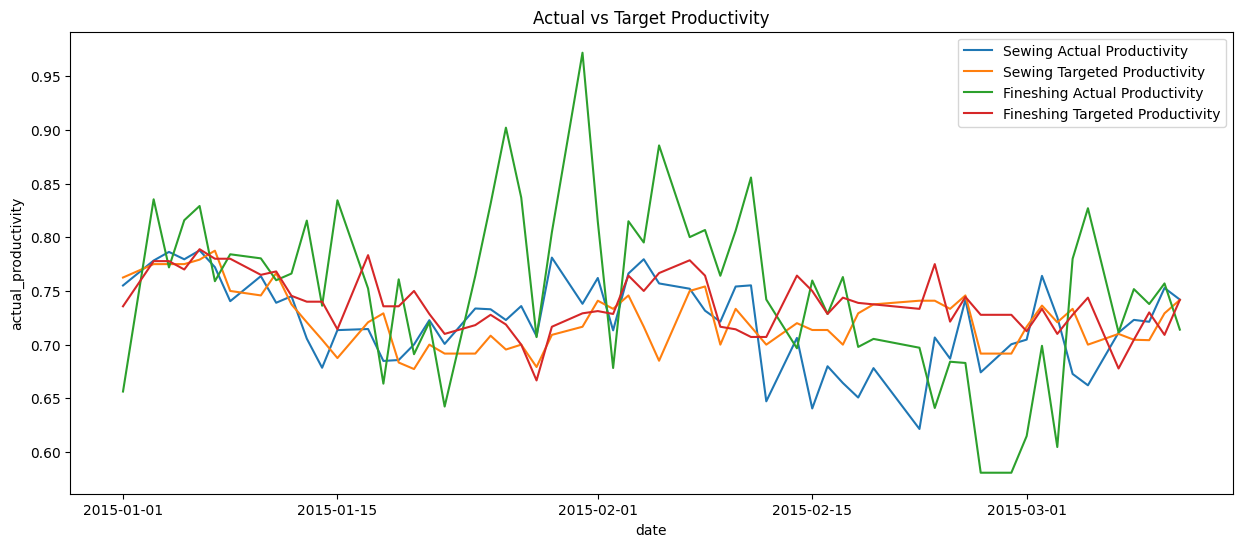

In [779]:
# plot the team's actual productivity vs target productivity


plt.figure(figsize=(15,6))
sns.lineplot(x='date' , y= 'actual_productivity', data=sewing, label='Sewing Actual Productivity',ci=None)
sns.lineplot(x='date' , y= 'targeted_productivity', data=sewing, label='Sewing Targeted Productivity',ci=None)
#sns.lineplot(x='date' , y= 'incentive', data=sewing, label='Sewing Targeted Productivity',ci=None)
sns.lineplot(x='date' , y= 'actual_productivity', data=finishing, label='Fineshing Actual Productivity',ci=None)
sns.lineplot(x='date' , y= 'targeted_productivity', data=finishing, label='Fineshing Targeted Productivity',ci=None)
#sns.lineplot(x='date' , y= 'incentive', data=finishing, label='Fineshing Targeted Productivity',ci=None)
plt.title('Actual vs Target Productivity')
plt.show()

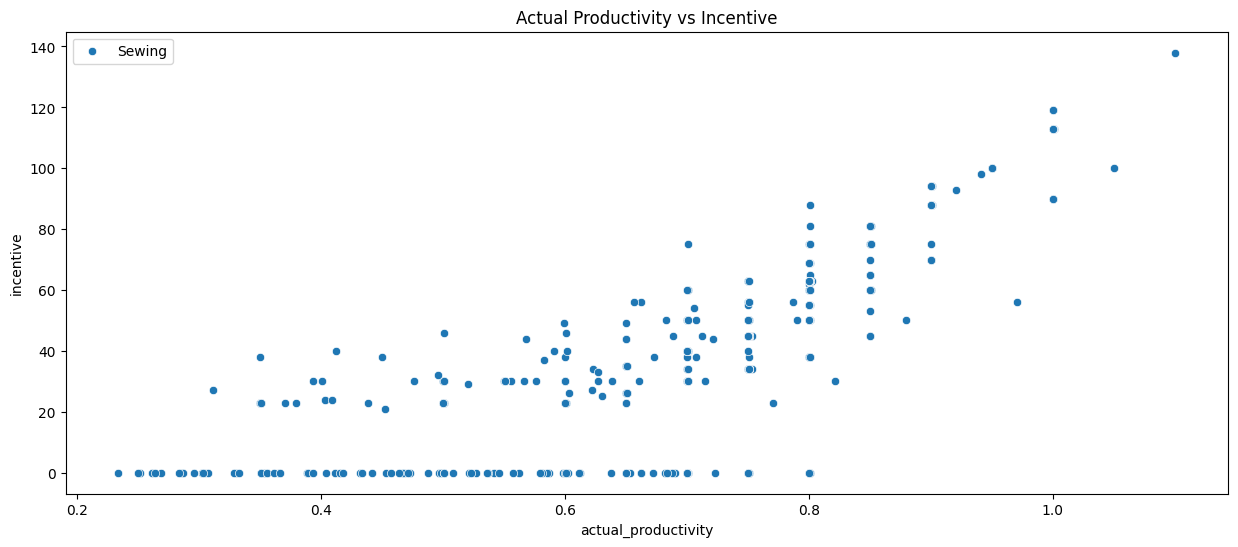

In [780]:
# sctter plot of actual productivity vs incentive

plt.figure(figsize=(15,6))
sns.scatterplot(x='actual_productivity', y='incentive', data=sewing, label='Sewing',ci=None)
plt.title('Actual Productivity vs Incentive')
plt.show()

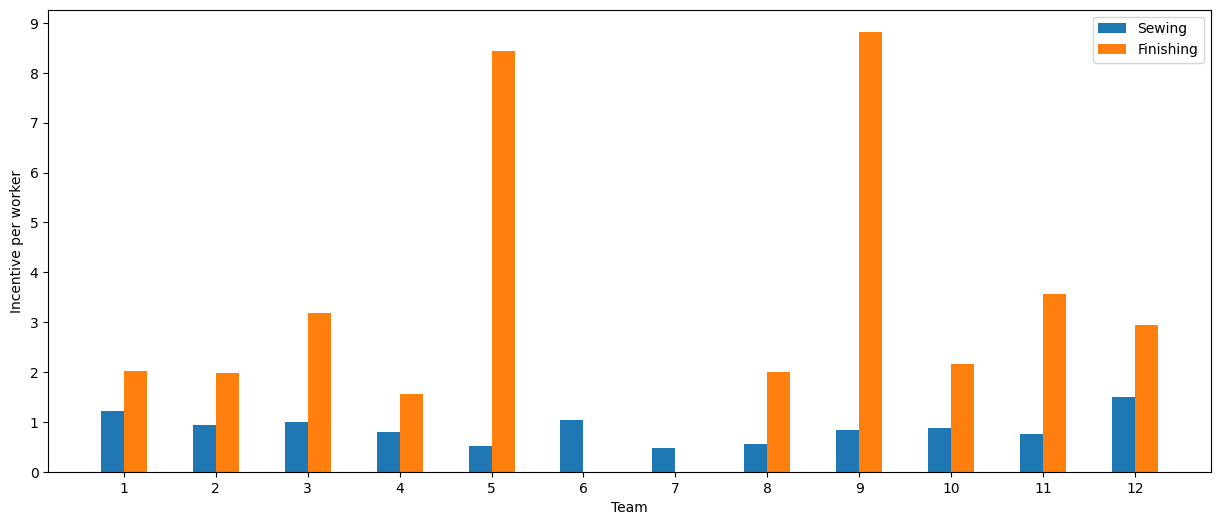

In [781]:
# Set the width of the bars
bar_width = 0.25
plt.figure(figsize=(15,6))
# Plot the bar chart for boys
plt.bar(new_sewing['team'] - bar_width/2, new_sewing['avg_incentive'], bar_width, label='Sewing')

# Plot the bar chart for girls
plt.bar(new_finishing['team'] + bar_width/2, new_finishing['avg_incentive'], bar_width, label='Finishing')

# Set the x-axis label
plt.xlabel('Team')

# Set the y-axis label
plt.ylabel('Incentive per worker')

# Add a legend to the plot
plt.legend()

# Set the x-axis ticks
plt.xticks(np.arange(1, 13, 1))

plt.yticks(np.arange(0,10))

plt.savefig('team_split_incentive.png',bbox_inches='tight')
# Show the plot
plt.show()



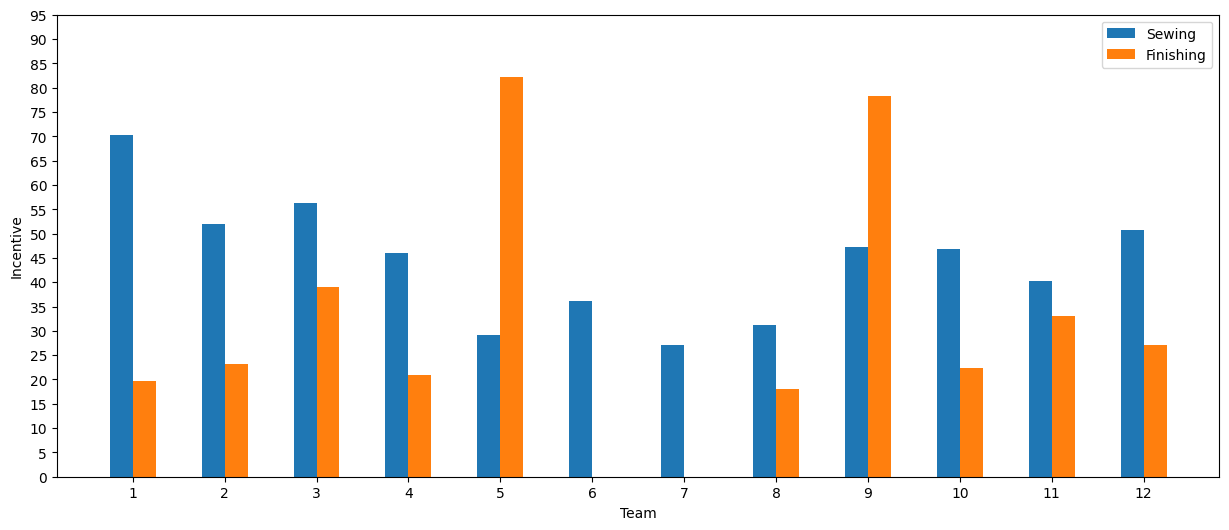

In [782]:
# Set the width of the bars
bar_width = 0.25
plt.figure(figsize=(15,6))
# Plot the bar chart for boys
plt.bar(new_sewing['team'] - bar_width/2, new_sewing['incentive'], bar_width, label='Sewing')

# Plot the bar chart for girls
plt.bar(new_finishing['team'] + bar_width/2, new_finishing['incentive'], bar_width, label='Finishing')

# Set the x-axis label
plt.xlabel('Team')

# Set the y-axis label
plt.ylabel('Incentive')

# Add a legend to the plot
plt.legend()

# Set the x-axis ticks
plt.xticks(np.arange(1, 13, 1))

plt.yticks(np.arange(0, 100, 5))


# Show the plot
plt.show()



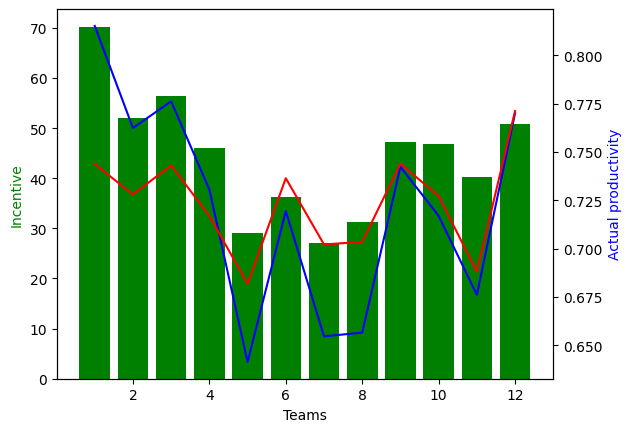

In [783]:
#prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(new_sewing['team'], new_sewing['incentive'], color='g') 
ax2.plot(new_sewing['team'], new_sewing['actual_productivity'], 'b-')
ax2.plot(new_sewing['team'], new_sewing['targeted_productivity'], 'r-')


ax1.set_xlabel('Teams')
ax1.set_ylabel('Incentive', color='g')
ax2.set_ylabel('Actual productivity', color='b')
#ax1.set_xticklabels(new_sewing['team'], rotation='vertical', size=8, )
plt.savefig('sewing_incentive')
plt.show()

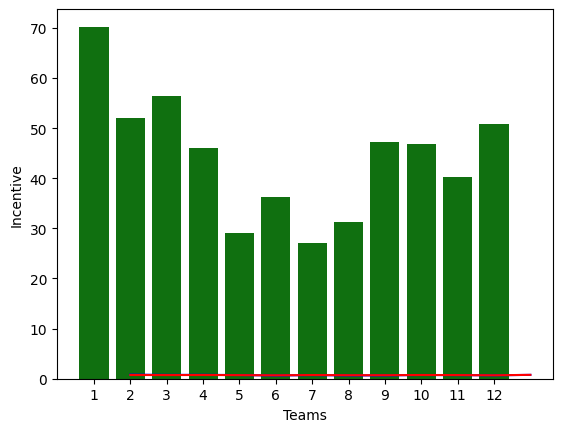

In [784]:
# Create the bar plot for incentives
sns.barplot(x='team', y='incentive', data=new_sewing, color='g')

# Create the line plot for actual productivity
sns.lineplot(x='team', y='actual_productivity', data=new_sewing, color='b')

# Create the line plot for targeted productivity
sns.lineplot(x='team', y='targeted_productivity', data=new_sewing, color='r')

# Set the labels for x and y axes
plt.xlabel('Teams')
plt.ylabel('Incentive')

# Show the plot
plt.show()

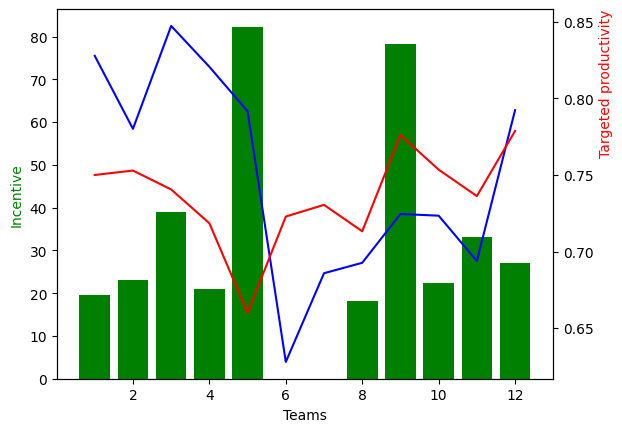

In [785]:
#prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(new_finishing['team'], new_finishing['incentive'], color='g') 
ax2.plot(new_finishing['team'], new_finishing['actual_productivity'], 'b-')
ax2.plot(new_finishing['team'], new_finishing['targeted_productivity'], 'r-')


ax1.set_xlabel('Teams')

ax1.set_ylabel('Incentive', color='g')
ax2.set_ylabel('Actual productivity', color='b',loc='bottom')
ax2.set_ylabel('Targeted productivity', color='r',loc='top')
#ax1.set_xticklabels(new_finishing['team'], rotation='vertical', size=8, )

plt.savefig('fineshing_incentive',bbox_inches='tight')
plt.show()

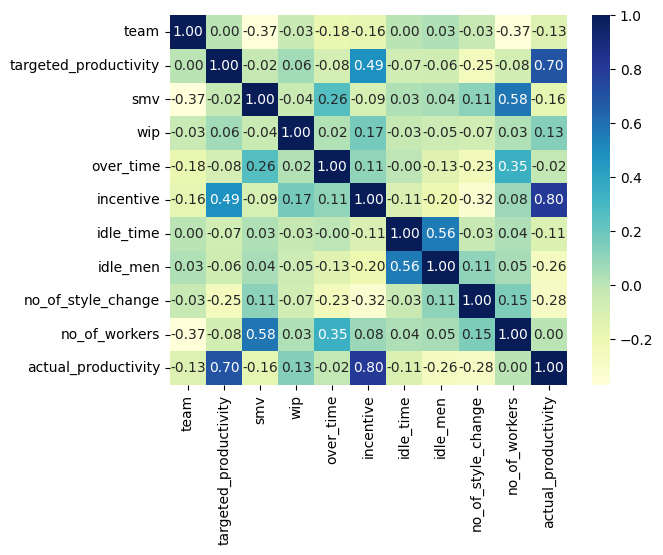

In [786]:
# create a correlation matrix for the sewing dataframe

# check for correlation between the between the dictionary of outliers and the correlation column
corr = sewing.corr()
corr.style.background_gradient(cmap='coolwarm')

# plot the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,fmt= '.2f',cmap="YlGnBu")

# save the correlation matrix to a file
plt.savefig('correlation_matrix_sewing_incentive.png',bbox_inches='tight')
plt.show()



In [787]:
df.head(1)
insentive_total_df = df.copy()

In [788]:
# replace all 0 values in the incentive column with the mean 

In [789]:
insentive_total_df = insentive_total_df['incentive'].replace(0, insentive_total_df['incentive'].mean(), inplace=True)

In [790]:
print(insentive_total_df)

None


## 6. Another interesting aspect of the data, Combining motivation calculation <a class="anchor" id="6"></a>

## 7. Style changes impact on sewing deparments productivity and idle time <a class="anchor" id="7"></a>

there em to be a correlation between idle time and implementing a style change, whereas productivity drops around the period

Divide no. workers with idle workers to gain a comparable 


In [791]:
idle_time = df.copy()

idle_time.head(100)

date   quarter department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2  2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1     sweing  Thursday     6                   0.80   
..        ...       ...        ...       ...   ...                    ...   
95 2015-01-06  Quarter1     sweing   Tuesday    12                   0.80   
96 2015-01-06  Quarter1     sweing   Tuesday     7                   0.80   
97 2015-01-06  Quarter1     sweing   Tuesday     8                   0.80   
98 2015-01-06  Quarter1     sweing   Tuesday     6                   0.80   
99 2015-01-06  Quarter1     sweing   Tuesday    10                   0.75   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
..    ...     ...        ...        ...        ...       ...   
95  11.61  1101.0       5310         50        0.0         0   
96  25.90  1035.0      10170         38        0.0         0   
97  25.90  1083.0      10170         38        0.0         0   
98  11.61   910.0       4470         38        0.0         0   
99  28.08  1209.0      10530         45        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
..                 ...            ...                  ...  
95                   0           31.5             0.800141  
96                   0           56.5             0.800129  
97                   0           56.5             0.800129  
98                   0           31.5             0.800077  
99                   0           58.5             0.750545  

[100 rows x 15 columns]

In [792]:
idle_time['idle_time_percent'] = idle_time['idle_men'] /idle_time['no_of_workers']

idle_time.head(100)

date   quarter department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2  2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1     sweing  Thursday     6                   0.80   
..        ...       ...        ...       ...   ...                    ...   
95 2015-01-06  Quarter1     sweing   Tuesday    12                   0.80   
96 2015-01-06  Quarter1     sweing   Tuesday     7                   0.80   
97 2015-01-06  Quarter1     sweing   Tuesday     8                   0.80   
98 2015-01-06  Quarter1     sweing   Tuesday     6                   0.80   
99 2015-01-06  Quarter1     sweing   Tuesday    10                   0.75   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
..    ...     ...        ...        ...        ...       ...   
95  11.61  1101.0       5310         50        0.0         0   
96  25.90  1035.0      10170         38        0.0         0   
97  25.90  1083.0      10170         38        0.0         0   
98  11.61   910.0       4470         38        0.0         0   
99  28.08  1209.0      10530         45        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  idle_time_percent  
0                    0           59.0             0.940725                0.0  
1                    0            8.0             0.886500                0.0  
2                    0           30.5             0.800570                0.0  
3                    0           30.5             0.800570                0.0  
4                    0           56.0             0.800382                0.0  
..                 ...            ...                  ...                ...  
95                   0           31.5             0.800141                0.0  
96                   0           56.5             0.800129                0.0  
97                   0           56.5             0.800129                0.0  
98                   0           31.5             0.800077                0.0  
99                   0           58.5             0.750545                0.0  

[100 rows x 16 columns]

In [793]:
idle_time['idle_time_percent'].describe()

count    1197.000000
mean        0.006695
std         0.059987
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.775862
Name: idle_time_percent, dtype: float64

In [794]:
# compute mean productivity when style change is 2

mean_productivity = df.groupby('no_of_style_change')['actual_productivity'].mean()

# compute standard deviation of productivity when style change is 0, 1 and 2
std_productivity = df.groupby('no_of_style_change')['actual_productivity'].std()

# compute the standard error of productivity when style change is 0, 1 and 2
std_error_productivity = df.groupby('no_of_style_change')['actual_productivity'].sem()

# compute the number of observations when style change is 0, 1 and 2
n_productivity = df.groupby('no_of_style_change')['actual_productivity'].count()

# compute the t statistic
t_statistic = (mean_productivity[0] - mean_productivity[1]) / math.sqrt((std_error_productivity[0]**2/n_productivity[0]) + (std_error_productivity[1]**2/n_productivity[1]))

# compute the p value
p_value = stats.t.sf(abs(t_statistic), n_productivity[0] + n_productivity[1] - 2)

# print the p value
print(p_value)

# if the p value is less than 0.05, reject the null hypothesis
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')




0.0
Reject the null hypothesis


In [795]:
mean_productivity.head(100)

no_of_style_change
0    0.750425
1    0.615035
2    0.661932
Name: actual_productivity, dtype: float64

In [796]:
std_error_productivity.head(100)

no_of_style_change
0    0.005309
1    0.014705
2    0.022152
Name: actual_productivity, dtype: float64

In [797]:
std_productivity.head(100)

no_of_style_change
0    0.172026
1    0.157008
2    0.127255
Name: actual_productivity, dtype: float64

In [798]:
target_productivity = df.groupby('no_of_style_change').mean()



In [799]:
target_productivity.head(100).round(2)

team  targeted_productivity    smv      wip  over_time  \
no_of_style_change                                                           
0                   6.48                   0.74  13.61  1264.77    4477.99   
1                   5.61                   0.66  26.26   913.63    5316.84   
2                   7.55                   0.69  22.48   921.97    4825.45   

                    incentive  idle_time  idle_men  no_of_workers  \
no_of_style_change                                                  
0                       40.02       0.79      0.21          31.77   
1                       23.96       0.29      1.32          54.29   
2                       29.79       0.35      2.12          57.03   

                    actual_productivity  
no_of_style_change                       
0                                  0.75  
1                                  0.62  
2                                  0.66

In [800]:
target_productivity[['targeted_productivity','actual_productivity']]

targeted_productivity  actual_productivity
no_of_style_change                                            
0                                0.738305             0.750425
1                                0.661842             0.615035
2                                0.687879             0.661932

In [801]:
target_productivity['difference'] = target_productivity['actual_productivity'] / target_productivity['targeted_productivity'] * 100

In [802]:
new_tar_df = target_productivity[['targeted_productivity','actual_productivity','difference']].head(100).round(2)

In [803]:
print(new_tar_df.style.to_latex(position_float='centering'))

\begin{table}
\centering
\begin{tabular}{lrrr}
 & targeted_productivity & actual_productivity & difference \\
no_of_style_change &  &  &  \\
0 & 0.740000 & 0.750000 & 101.640000 \\
1 & 0.660000 & 0.620000 & 92.930000 \\
2 & 0.690000 & 0.660000 & 96.230000 \\
\end{tabular}
\end{table}



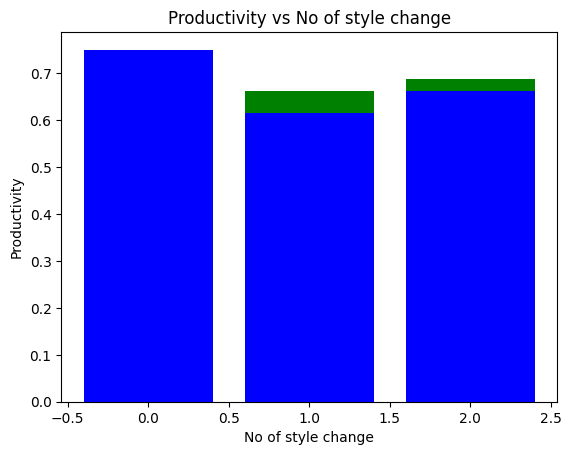

In [804]:
# plot the bar chart for target productivity

plt.bar(target_productivity.index, target_productivity['targeted_productivity'], color='g')

# plot the bar chart for actual productivity

plt.bar(target_productivity.index, target_productivity['actual_productivity'], color='b')

# set the x and y labels

plt.xlabel('No of style change')

plt.ylabel('Productivity')

# set the title

plt.title('Productivity vs No of style change')

# save the plot to a file

plt.savefig('productivity_vs_no_of_style_change.png',bbox_inches='tight')

# show the plot


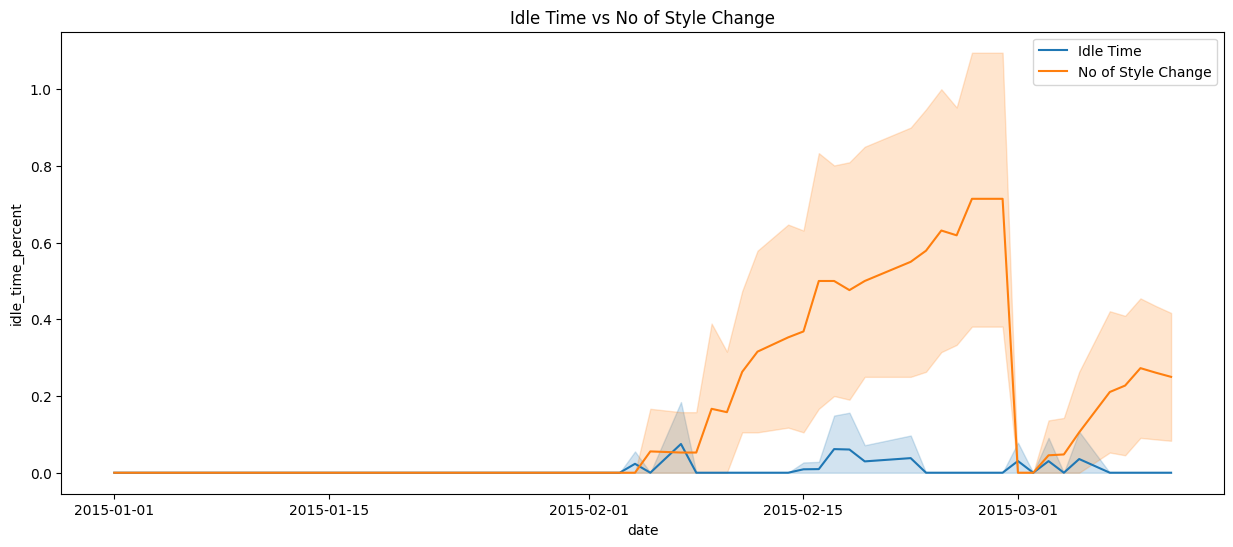

In [805]:
# plot style change with idle time 

plt.figure(figsize=(15,6))

sns.lineplot(x='date' , y='idle_time_percent', data=idle_time, label='Idle Time')
sns.lineplot(x='date' , y='no_of_style_change', data=idle_time, label='No of Style Change')
plt.title('Idle Time vs No of Style Change')
plt.show()


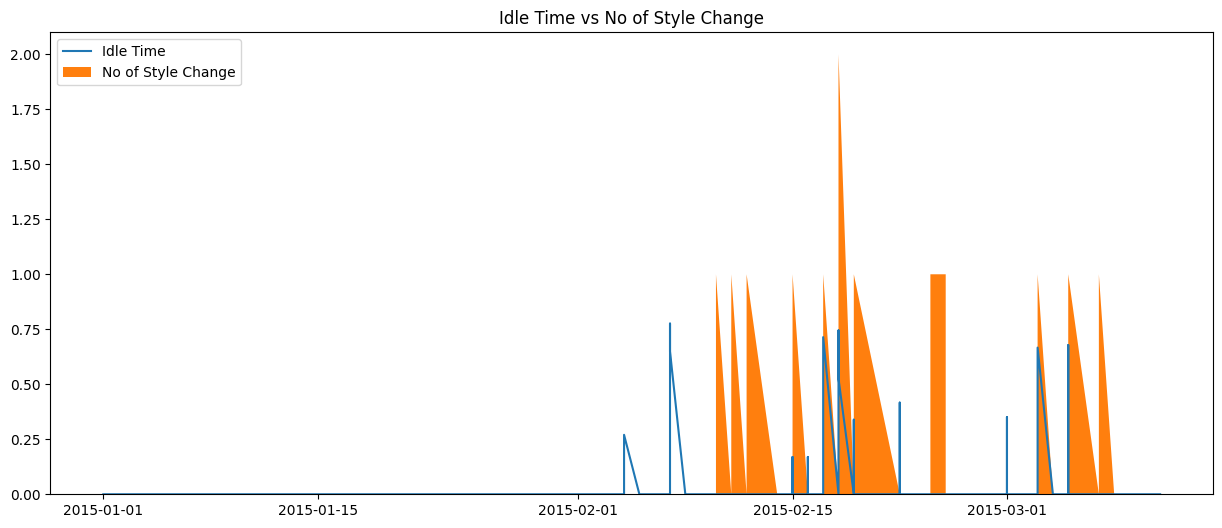

In [806]:
# create line & stacked column chart for idle time and no of style change

plt.figure(figsize=(15,6))
plt.plot(idle_time['date'], idle_time['idle_time_percent'], label='Idle Time')
plt.stackplot(idle_time['date'], idle_time['no_of_style_change'], labels=[ 'No of Style Change'])
plt.legend(loc='upper left')
plt.title('Idle Time vs No of Style Change')
plt.show()


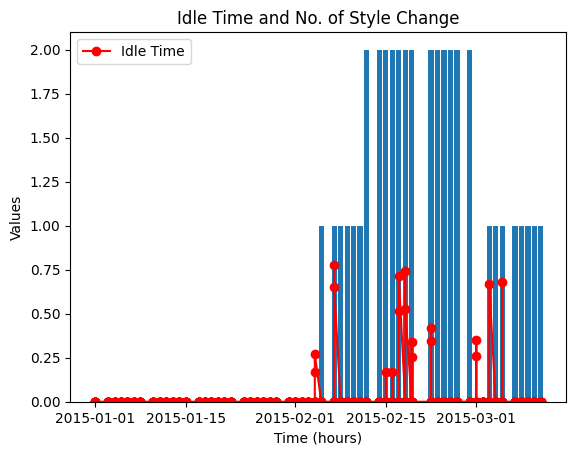

In [807]:
# Data for line chart

# Plot the line chart
plt.plot(idle_time['date'], idle_time['idle_time_percent'], '-o', color='red', label='Idle Time')

# Plot the stacked column chart

p1 = plt.bar(idle_time['date'], idle_time['no_of_style_change'])

# Add labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Values')
plt.title('Idle Time and No. of Style Change')

# Add legend
plt.legend()

# Show plot
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_6320\1207158589.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(idle_time['no_of_style_change'], rotation='vertical', size=8)


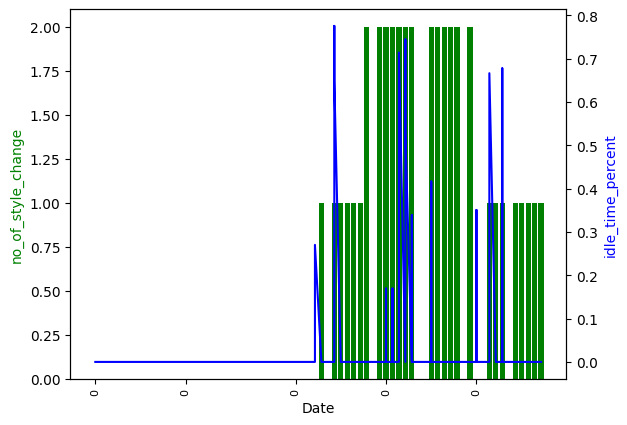

In [808]:
#prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(idle_time['date'], idle_time['no_of_style_change'], color='g') 
ax2.plot(idle_time['date'], idle_time['idle_time_percent'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('no_of_style_change', color='g')
ax2.set_ylabel('idle_time_percent', color='b')
ax1.set_xticklabels(idle_time['no_of_style_change'], rotation='vertical', size=8)

plt.show()